In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
import statsmodels.api as sm
from colorama import Fore, Style
from scipy.optimize import fsolve, curve_fit
import yfinance as yf
import akshare as ak
import sys
sys.path.append('../src') 
from utils import plot_candlestick, get_optimum_clusters, exponential_func

from chinese_index_etf_strategy import etf_strategy, etf_regression
from chinese_commodity_strategy import commodity_strategy
from stock_strategy import stock_strategy

## Some sample code that're working

Problem with index: no price adjust available.

Need to use 全收益index

e.g. 沪深300全收益：csih00300

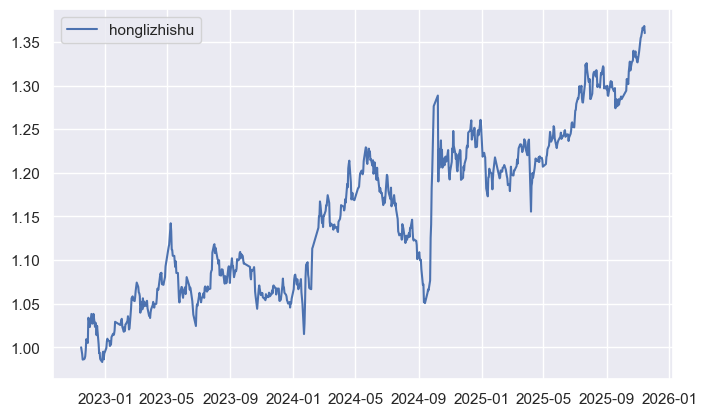

In [2]:
plt.figure(figsize=(8,4.8))

# 红利指数 - 全收益
etf_code = 'csiH00922'
df = etf_strategy(etf_code, source="index").df
plt.plot(df['date'], df['close'] / df.iloc[0]['close'], label='honglizhishu')
# 红利etf
try:
    etf_code = '515180'
    df_1 = etf_strategy(etf_code).df
    plt.plot(df_1['date'], df_1['close'] / df_1.iloc[0]['close'], label='hongli etf')
except:
    pass
plt.legend()

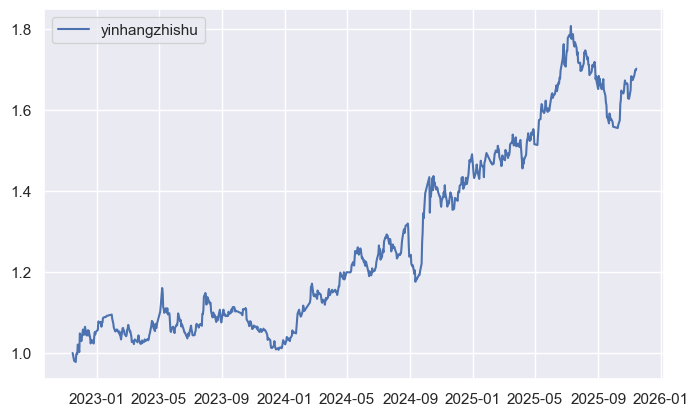

In [3]:
plt.figure(figsize=(8,4.8))

# 银行指数 - 全收益
etf_code = 'csiH20180'
df = etf_strategy(etf_code, source="index").df
plt.plot(df['date'], df['close'] / df.iloc[0]['close'], label='yinhangzhishu')
# 银行etf
try:
    etf_code = '512820'
    df_1 = etf_strategy(etf_code).df
    plt.plot(df_1['date'], df_1['close'] / df_1.iloc[0]['close'], label='yinhang etf')
except:
    pass
plt.legend()

[*********************100%***********************]  1 of 1 completed


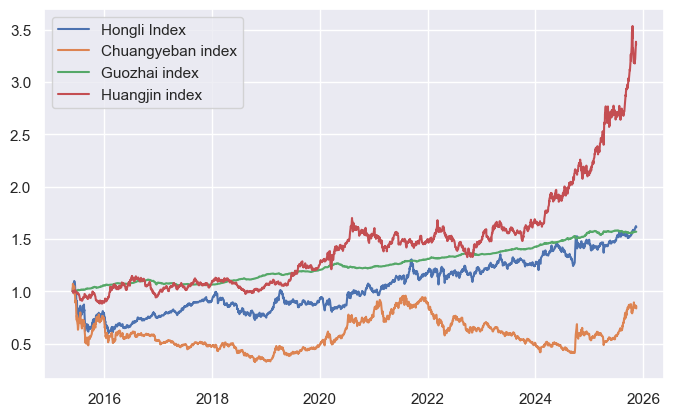

In [4]:
plt.figure(figsize=(8,4.8))

# 红利指数-全收益 vs 创业板 vs 5年期国债 vs 黄金
etf_code = 'csiH00922'
df = etf_strategy(etf_code, source="index", start='20150601').df
plt.plot(df['date'], df['close'] / df.iloc[0]['close'], label='Hongli Index')

etf_code = 'sz399006'
df_1 = etf_strategy(etf_code, source="index", start='20150601').df
plt.plot(df_1['date'], df_1['close'] / df_1.iloc[0]['close'], label='Chuangyeban index')

etf_code = 'csiH11006'
df_2 = etf_strategy(etf_code, source="index", start='20150601').df
plt.plot(df_2['date'], df_2['close'] / df_2.iloc[0]['close'], label='Guozhai index')

# commodity_code = 'Au99.99'
# df_3 = commodity_strategy(commodity_code, start='20150101').df

df_3 = stock_strategy('gld', start='2015-06-01').df
plt.plot(df_3['date'], df_3['close'] / df_3.iloc[0]['close'], label='Huangjin index')

plt.legend()

# 短债：CSIH11015

In [5]:
# # Tongxin ETF, changnei, history
# etf_code = "sh515880"  # ETF代码
# etf_hist = ak.fund_etf_hist_sina(symbol=etf_code)
# etf_hist.tail()

In [6]:
# # Tongxin ETF, changnei, realtime
# df = ak.fund_etf_spot_ths()
# df[df['基金代码']=='515880']

In [7]:
# # Tongxin ETF, changnei, lishi and shishi
# etf_code = "515880"  # ETF代码
# start_date = (datetime.today() - relativedelta(years=3)).strftime('%Y%m%d')   # 开始日期
# end_date = datetime.today().strftime('%Y%m%d')  # 结束日期

# try:
#     etf_hist = ak.fund_etf_hist_em(symbol=etf_code, period="daily", start_date=start_date, end_date=end_date, adjust="")
#     etf_hist.rename(columns={"日期": 'date', "开盘": 'open', "收盘": 'close', "最高": 'high', "最低": 'low', "成交量": 'volume', "成交额": 'amount'}, inplace=True)
#     etf_hist.tail()
# except:
#     pass

In [8]:
# # Huangjin, history
# spot_hist_sge_df = ak.spot_hist_sge(symbol='Au99.99')
# spot_hist_sge_df['date']= pd.to_datetime(spot_hist_sge_df['date'])
# spot_hist_sge_df.tail()

In [9]:
# # Huangjin, realtime
# spot_quotations_sge_df = ak.spot_quotations_sge(symbol="Au99.99")
# spot_quotations_sge_df[spot_quotations_sge_df['时间'] == spot_quotations_sge_df['时间'].max()]

In [10]:
# spot_quotations_sge_df[spot_quotations_sge_df['时间'] == spot_quotations_sge_df['时间'].max()]['现价']

## ALL ETFs

In [11]:
# 石油石化/化工
# 指数：CSIH11057
etf_code = "516570" # 159731
try:
    stg = etf_strategy(etf_code, strategy='daily')
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [12]:
# 中证银行
# 指数：sz399986
# 全收益指数：csiH20180
etf_code = "512820"
try:
    stg = etf_strategy(etf_code, start='20180101')
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    print(f'Regression price since launch: {etf_regression(etf_code)['fitted']}')
    print(f'Regression price since 2020-03-20: {etf_regression(etf_code, regression_start='20200320')['fitted']}')
except:
    pass

In [13]:
# 500低波
# 指数：CSI930782
etf_code = "512260"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [14]:
# 半导体
# 指数: CSIH30184
etf_code = "512480"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [15]:
# 环保
# 指数: sh000827
etf_code = "512580"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [16]:
# 创业板
# 指数: sz399006

etf_code = "159948"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [17]:
# 机器人
# 指数: CSIH30590

etf_code = "562500"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [18]:
# 人工智能
# 指数: CSI930713

etf_code = "159819"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [19]:
# 必选消费
# 指数: sh000932

etf_code = "512600"
try:
    stg = etf_strategy(etf_code, start='20210101')
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [20]:
# 家电
# 指数: CSI930697

etf_code = "560880"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [21]:
# 有色金属
# 指数: sh000819

etf_code = "512400"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [22]:
# 油气
# 指数: sz399439
etf_code = "159697"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

* Current etf price: 1887.03
* Recent high: 1981.65
* Current etf price is at 95.23% of recent high
Latest 5 Day MA: 1866.73
Latest 5 Day EMA: 1867.95
Latest 20 Day MA: 1819.43
Latest lower Bollinger Band, 20MA: 1745.74
Latest higher Bollinger Band, 20MA: 1893.13
Latest 50 Day MA: 1757.75
Latest lower Bollinger Band, 50MA: 1613.3
Latest higher Bollinger Band, 50MA: 1902.19
Latest 50 Day EMA: 1773.67
Latest 120 Day MA: 1704.68
Latest 200 Day MA: 1669.84
Latest 200 Day EMA: 1701.96
Latest 10 Week MA: 1764.2
Latest 20 Week MA: 1721.64
Latest 30 Week MA: 1687.45
Latest 40 Week MA: 1670.73
Latest Lower Weekly Bollinger Band, 20MA: 1593.24
Latest Higher Weekly Bollinger Band, 20MA: 1850.05

Latest RSI: 74.41 
Latest RSI, raw 78.46 
Latest MACD Divergence: 4.4629 
5MA crosses 20MA at 1571.71
5MA break point: 1861.66
20MA break point: 1815.88
20MA lower Bollinger Band break point: 1736.57
20MA Upper Bollinger Band break point: 1895.18
50MA break point: 1755.11
50MA lower Bollinger Band break p

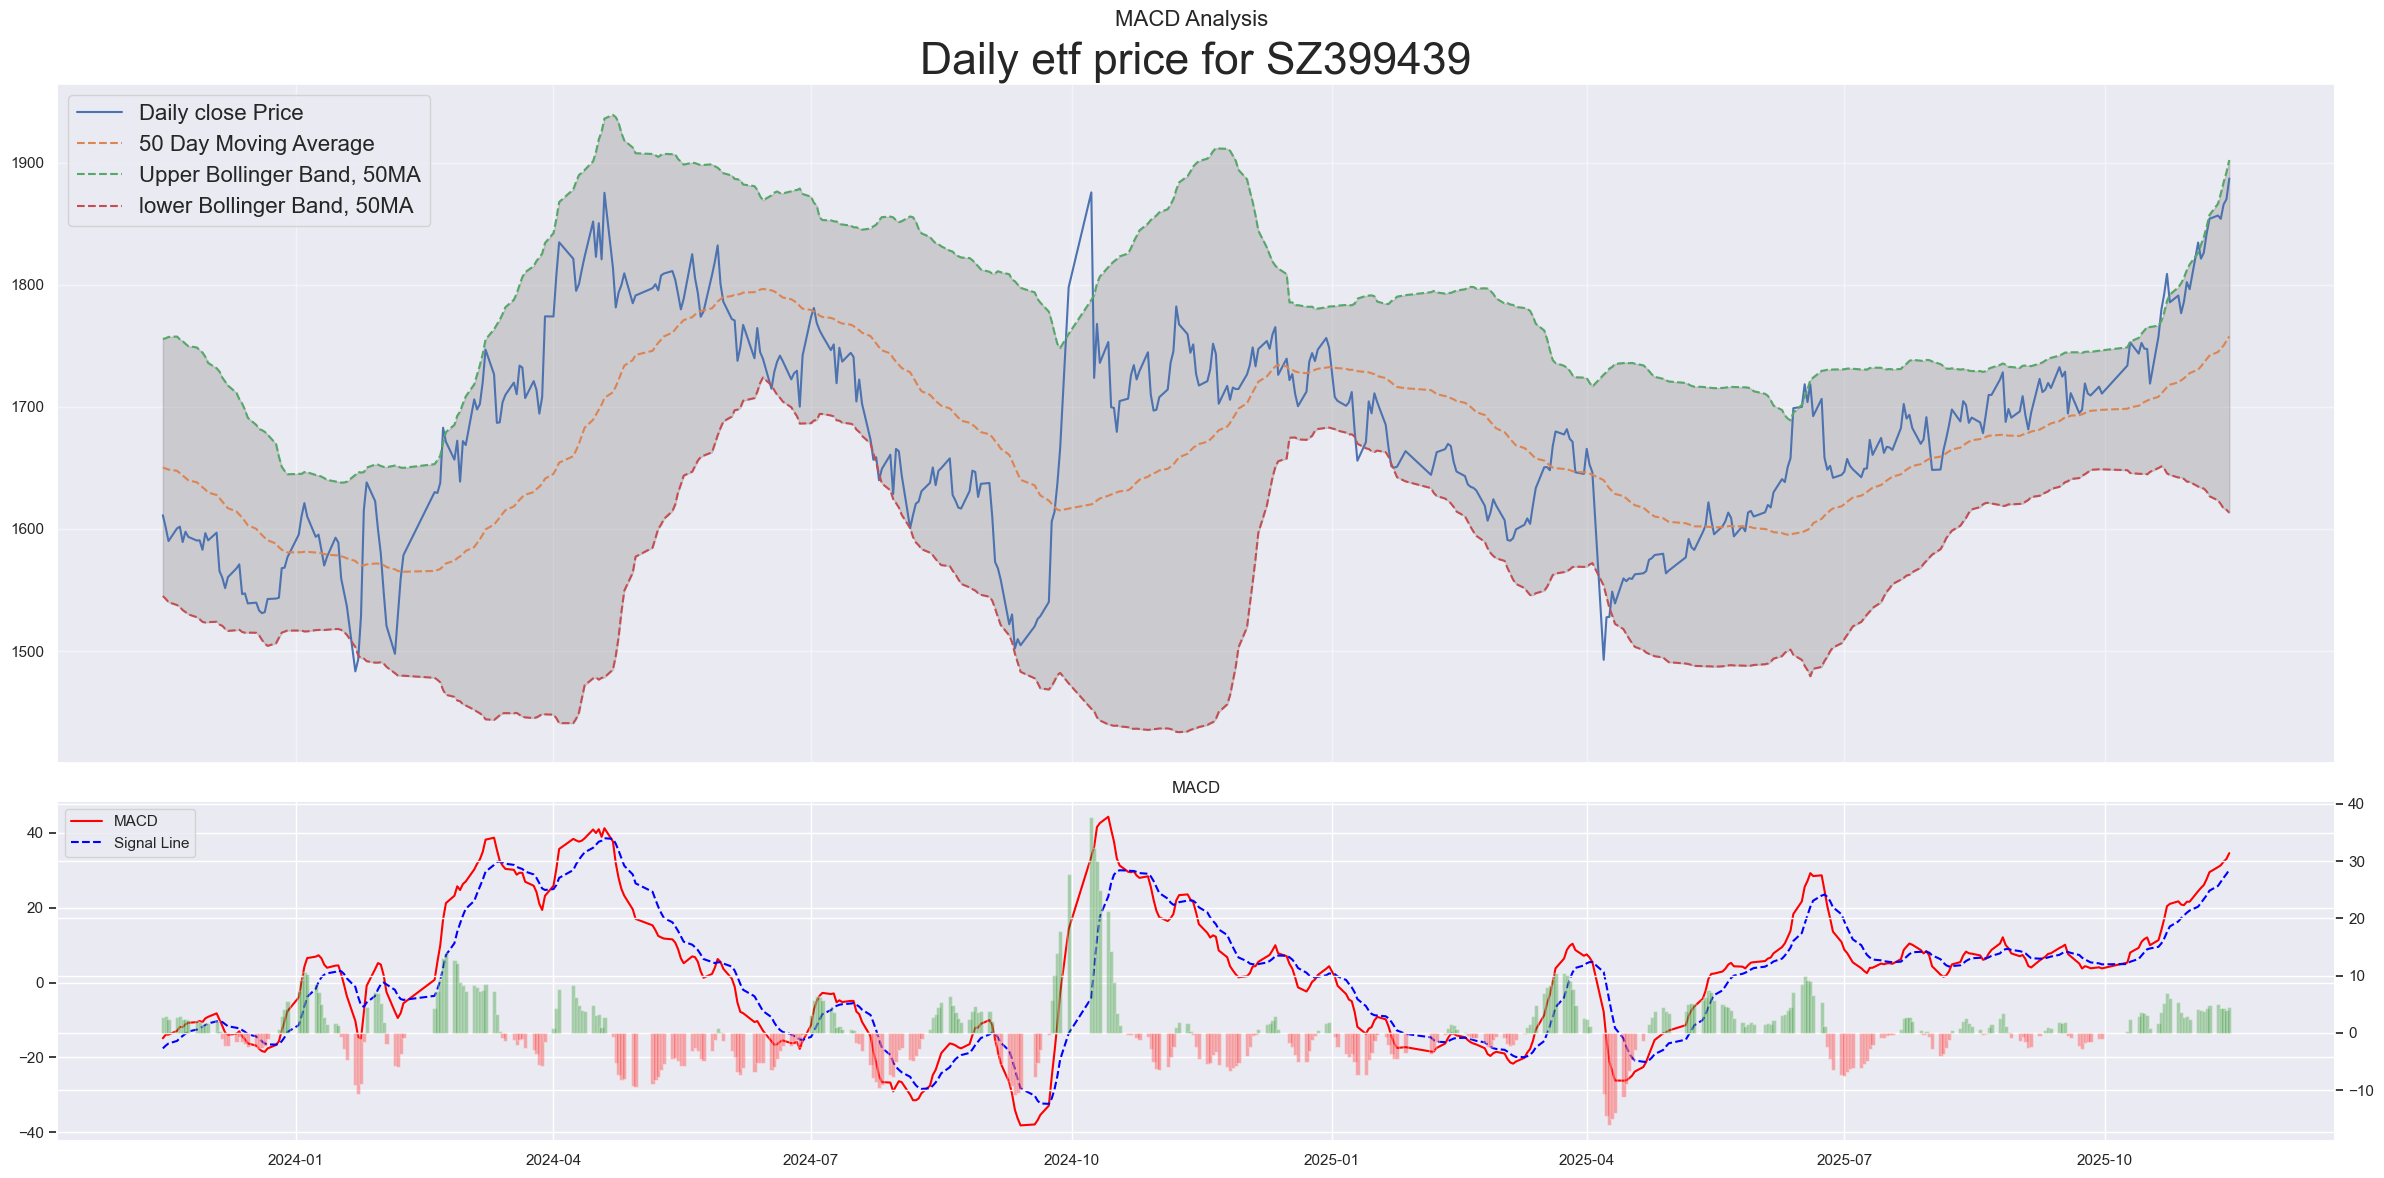

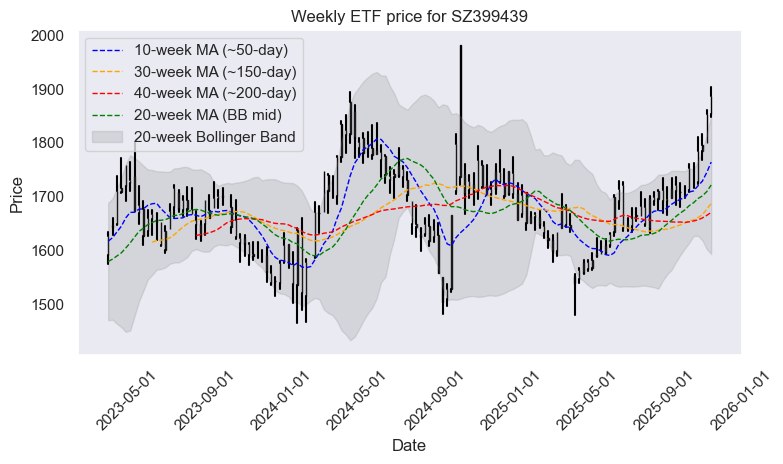

Current RSI: 74.41 
Current RSI raw: 85.85 
Current MACD Divergence: 4.2258 
Tomorrow inferred RSI: 74.41 
Tomorrow inferred RSI raw: 84.91 
Tomorrow inferred MACD Divergence: 3.5716 


In [23]:
etf_code = 'sz399439'
stg = etf_strategy(etf_code, source='index')
stg.output()
stg.plot_weekly_chart(candlestick=True)
stg.latest_metric()
stg.infer_metric()

In [24]:
# 通信
# 指数: CSI931160
etf_code = "515880"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [25]:
# 创新药
# 指数: CSI931152
etf_code = "516080"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [26]:
# 中药
# 指数: CSI930641
etf_code = "159647"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [27]:
# 煤炭
# 指数: sz399998
etf_code = "515220"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    # stg.plot_weekly_chart() # not useful
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [28]:
# 红利低波
# 指数: CSIH30269
# 全收益指数：CSIH20269
etf_code = "512890"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    print(f'Regression price since launch: {etf_regression(etf_code)['fitted']}')
except:
    pass

In [29]:
# 红利
# 指数: CSI000922 / SH000922
# 全收益指数：CSIH00922
etf_code = "515180"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    print(f'Regression price since launch: {etf_regression(etf_code)['fitted']}')
except:
    pass

Break all support; record min commodity price
Break all resistance; record max commodity price
* Current commodity price: 147    935.0
Name: 现价, dtype: float64 ~ up 1002.0 , down 463.0
* Recent high: 1002.0
* Current commodity price is at 147    93.31
Name: 现价, dtype: float64% of recent high
Latest 20 Day MA: 936.05
Latest lower Bollinger Band, 20MA: 882.01
Latest higher Bollinger Band, 20MA: 990.09
Latest 50 Day MA: 883.74
Latest lower Bollinger Band, 50MA: 733.7
Latest higher Bollinger Band, 50MA: 1033.77
Latest 50 Day EMA: 890.52
Latest 120 Day MA: 820.06
Latest 200 Day MA: 777.62
Latest 200 Day EMA: 785.35
Latest 10 Week MA: 899.99
Latest 20 Week MA: 838.92
Latest 30 Week MA: 817.79
Latest 40 Week MA: 791.48
Latest Lower Weekly Bollinger Band, 20MA: 691.58
Latest Higher Weekly Bollinger Band, 20MA: 986.25

Latest RSI: 58.37 
Latest MACD Divergence: -0.53 
20MA break point: 932.83
20MA lower Bollinger Band break point: 878.25
20MA Upper Bollinger Band break point: 987.42
50MA break 

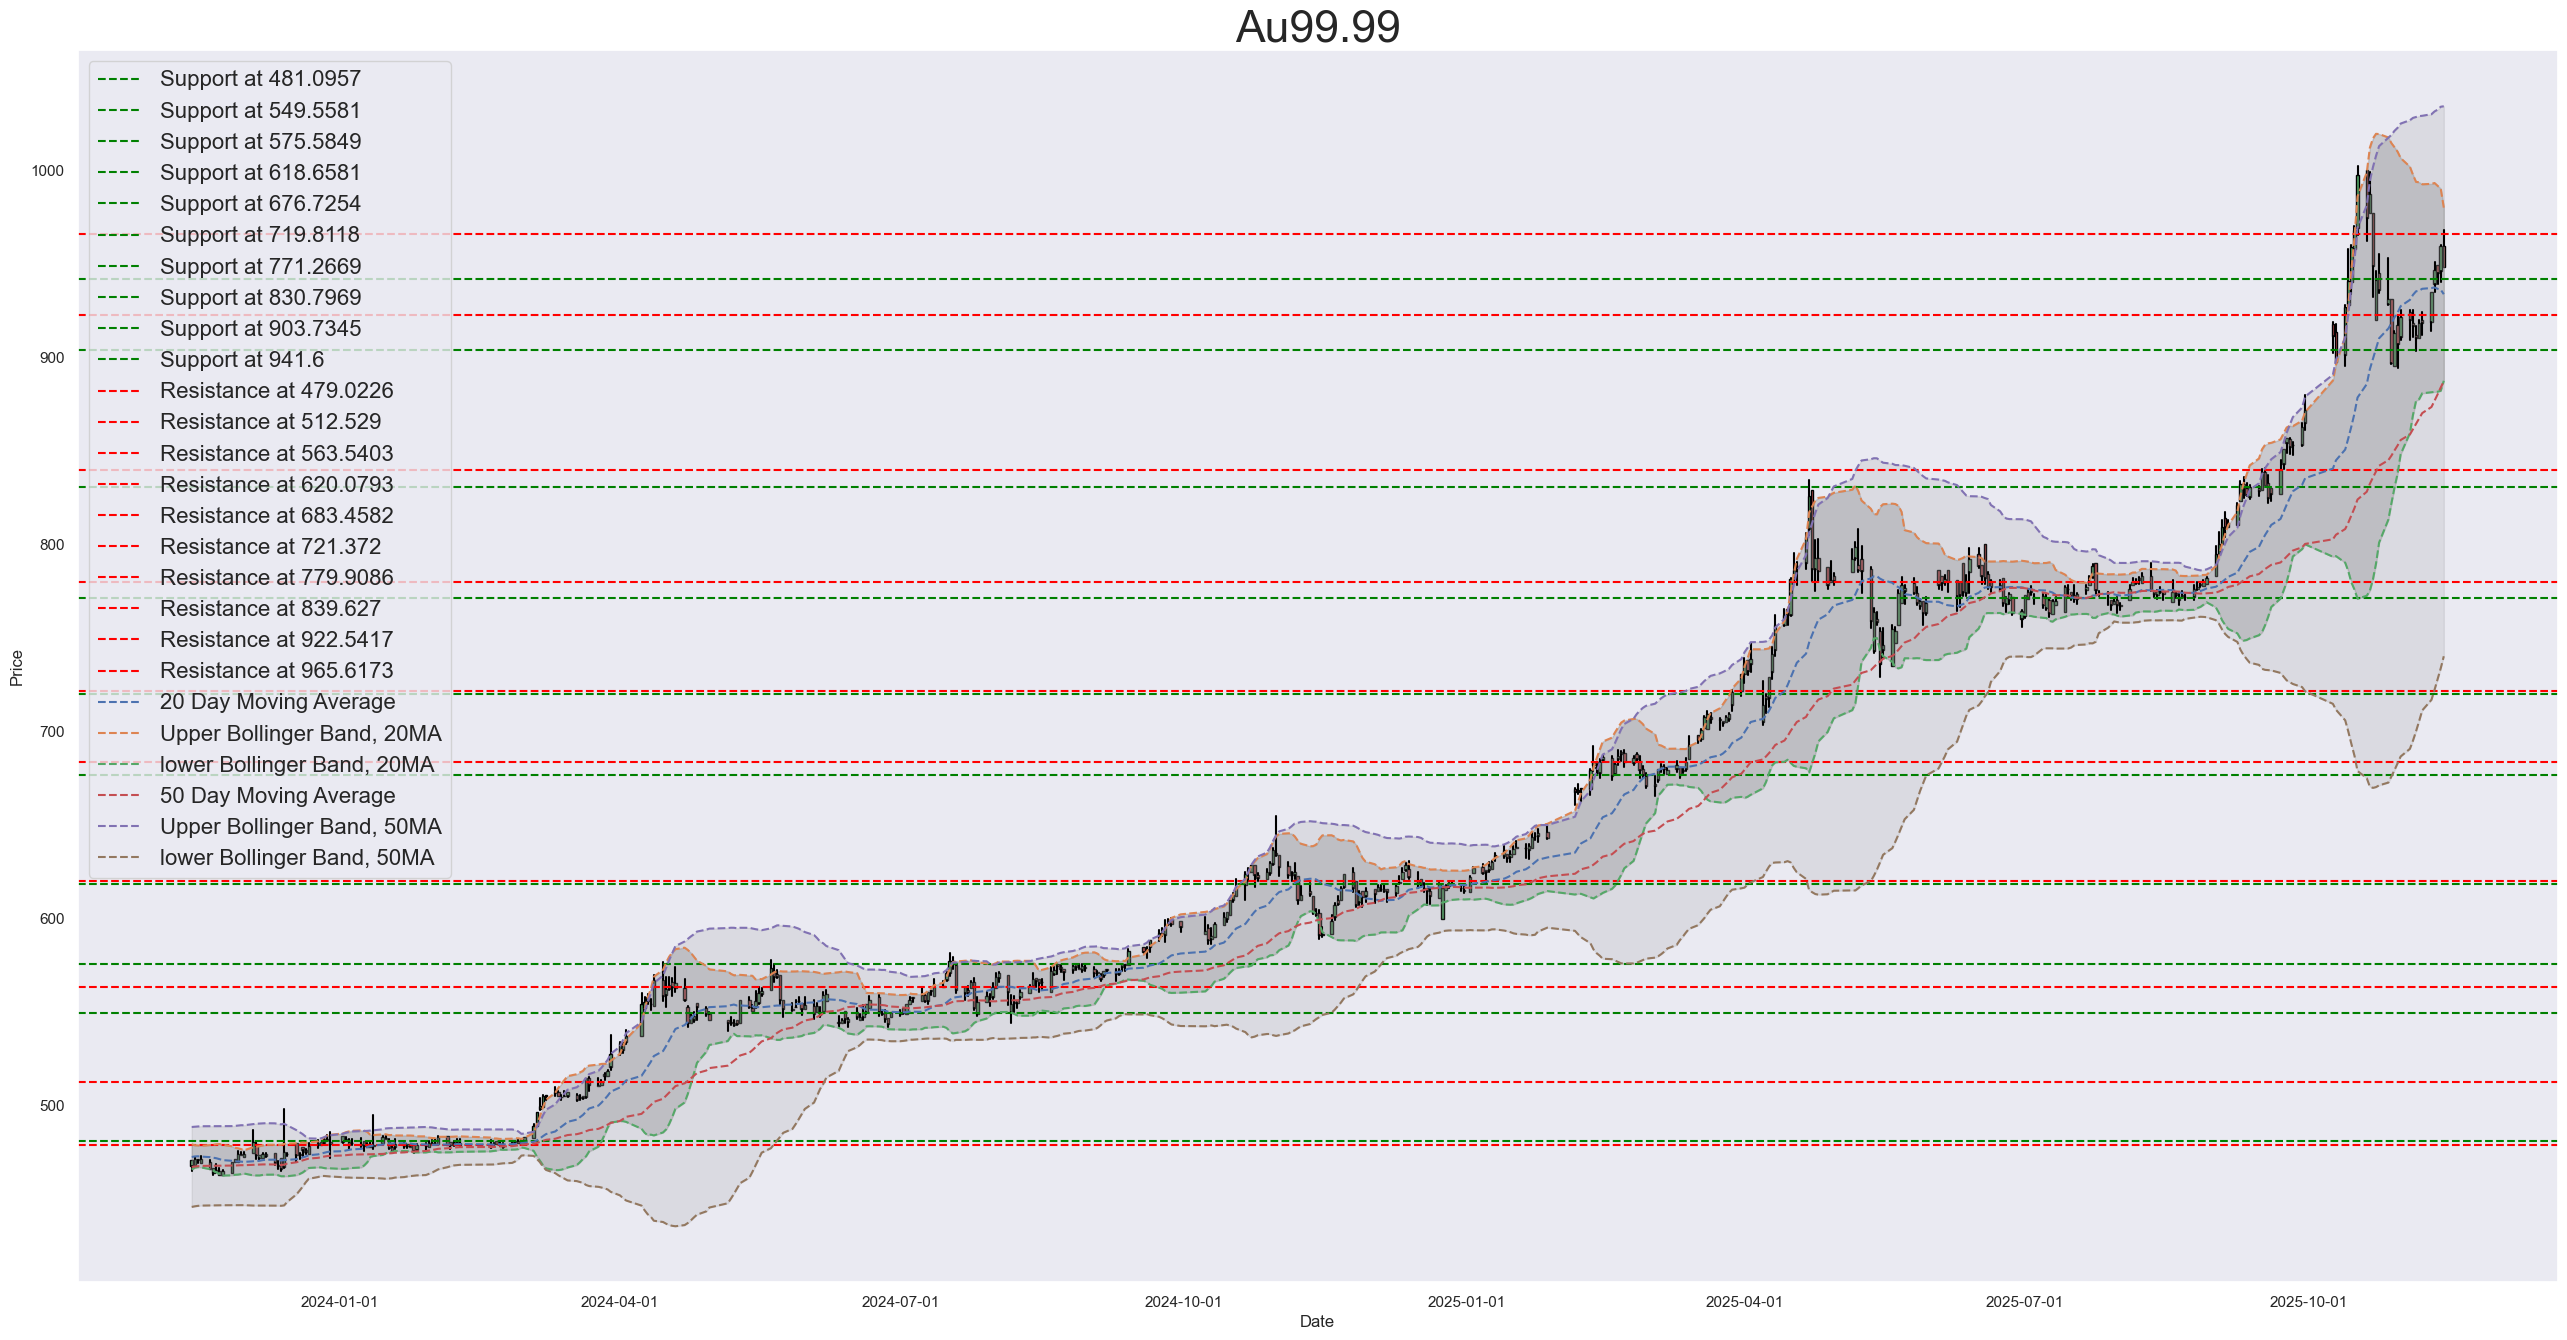

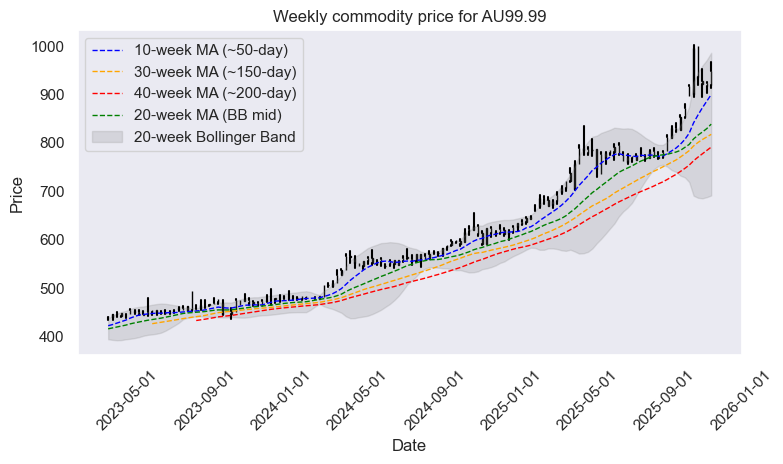

In [30]:
# 黄金
commodity_code = 'Au99.99'
try:
    stg = commodity_strategy(commodity_code, strategy='daily')
    stg.output()
    stg.plot_weekly_chart(candlestick=True)
except:
    pass

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


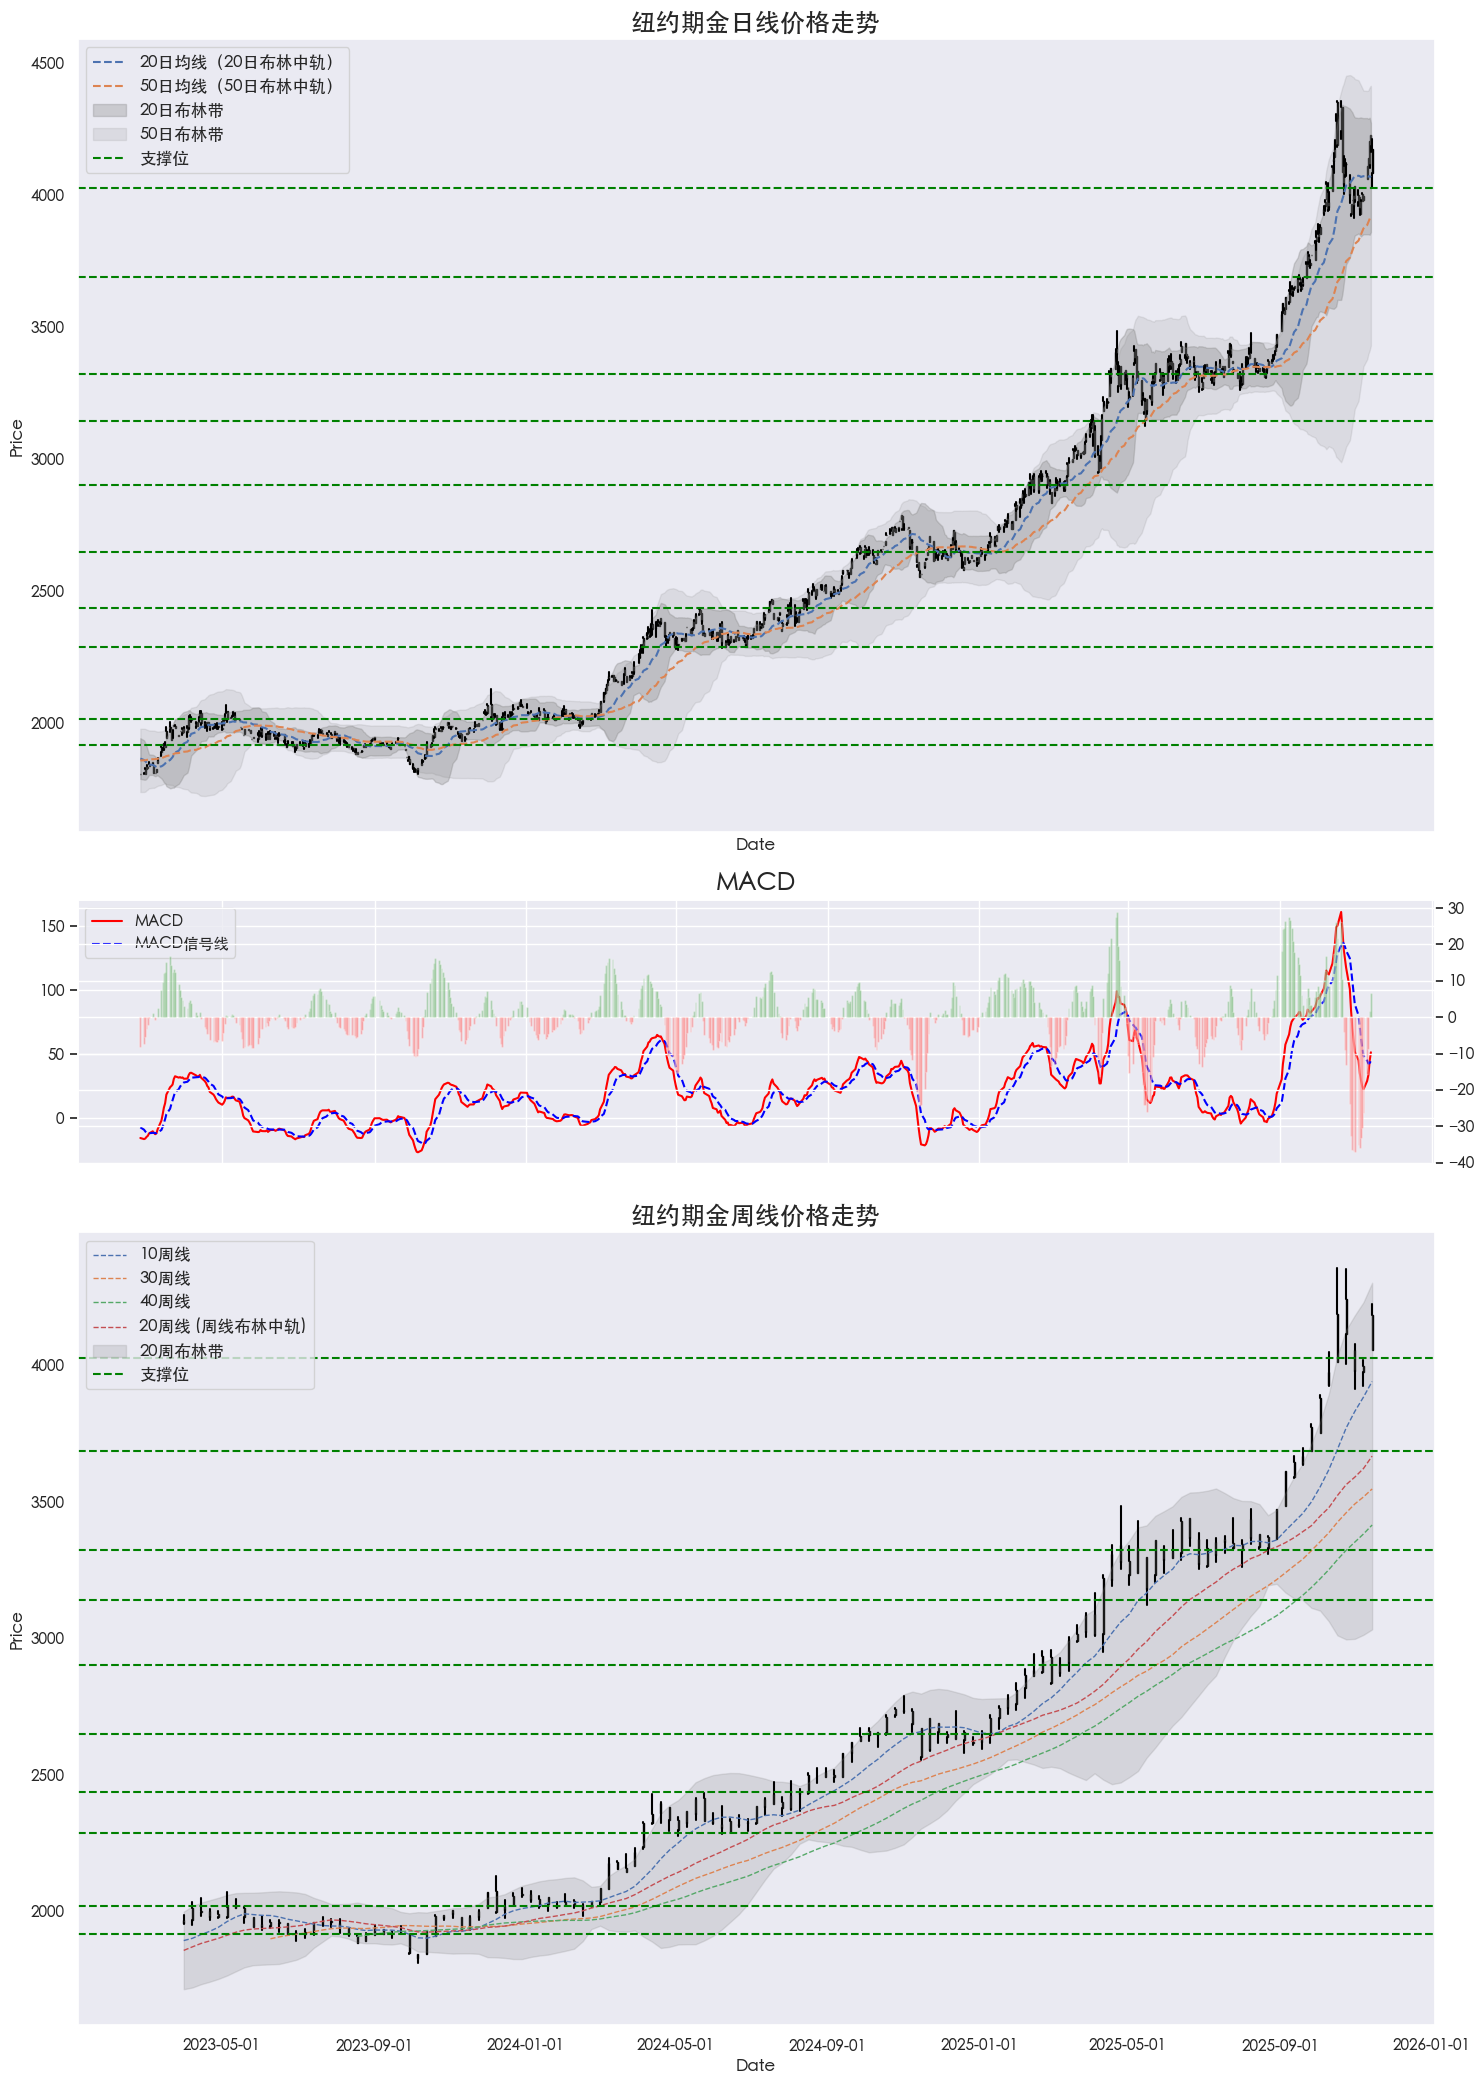

In [31]:
# Plot in Chinese

# commodity_code = 'Au99.99'
# stg = commodity_strategy(commodity_code)
stg = stock_strategy('gc=f')
df_plot = stg.df[stg.df['date'] >= '2023-02-24']
df_new = stg.ticker.reset_index()
df_new.columns = df_new.columns.str.lower()
df_plot = pd.concat([df_plot, df_new[['date', 'close', 'high', 'low', 'open', 'volume']]]) 
figsize=(15, 21)
plt.rcParams['font.sans-serif'] = ['Heiti TC'] 
fig, (ax1, ax2, ax4) = plt.subplots(3, 1, figsize=figsize, gridspec_kw={'height_ratios': [3, 1, 3]}, sharex=True)
ax1 = plot_candlestick(df_plot, ax=ax1)
# ax1.grid(True, alpha=0.5)

# ax1.plot(df_plot['date'], df_plot['close'], label='每日收盘价格')
ax1.plot(df_plot['date'], df_plot['20 Day MA'], ls='--', label='20日均线（20日布林中轨）')
# ax1.plot(df_plot['date'], df_plot['Upper Band - 20MA'], ls='--', label='20日布林上轨')
# ax1.plot(df_plot['date'], df_plot['Lower Band - 20MA'], ls='--', label='20日布林下轨')
ax1.plot(df_plot['date'], df_plot['50 Day MA'], ls='--', label='50日均线（50日布林中轨）')
# ax1.plot(df_plot['date'], df_plot['Upper Band - 50MA'], ls='--', label='50日布林上轨')
# ax1.plot(df_plot['date'], df_plot['Lower Band - 50MA'], ls='--', label='50日布林下轨')
ax1.fill_between(df_plot['date'], df_plot['Upper Band - 20MA'], df_plot['Lower Band - 20MA'], color='gray', alpha=0.3, label='20日布林带') # Fill the area between the bands
ax1.fill_between(df_plot['date'], df_plot['Upper Band - 50MA'], df_plot['Lower Band - 50MA'], color='gray', alpha=0.15, label='50日布林带')	

stg_daily = stock_strategy('gc=f', strategy='daily')
ax1.axhline(stg_daily.low_centers[0][0], color='green', ls='--', label="支撑位")
# ax1.axhline(stg_daily.high_centers[0][0], color='red', ls='--', label="阻力位")

for low in stg_daily.low_centers[1:]:
    ax1.axhline(low[0], color='green', ls='--')
# for high in stg_daily.high_centers[1:]:
#     ax1.axhline(high[0], color='red', ls='--')

ax1.set_title("纽约期金日线价格走势", fontsize=18)
ax1.legend(fontsize=12)

# Plot MACD and signal line, color bars based on MACD above/below signal line
ax2.plot(df_plot['date'], df_plot['MACD'], label='MACD', color='red')
ax2.plot(df_plot['date'], df_plot['MACD_signal'], label='MACD信号线', linestyle='--', color='blue')
bar_colors = ['green' if macd > signal else 'red' for macd, signal in zip(df_plot['MACD'], df_plot['MACD_signal'])]
ax3 = ax2.twinx()
ax3.bar(df_plot['date'], df_plot['MACD'] - df_plot['MACD_signal'], width=1.5,  alpha=0.3, align='center', color=bar_colors)        
ax2.set_title('MACD', fontsize=18)
ax2.legend()

ax4 = plot_candlestick(stg.weekly_summary[~stg.weekly_ma20.isna()].reset_index(), ax=ax4)
# ax4.plot(stg.weekly[~stg.weekly_ma20.isna()].index, stg.weekly[~stg.weekly_ma20.isna()], label="每周收盘价格", color="black", linewidth=1)
ax4.plot(stg.weekly_ma10[~stg.weekly_ma20.isna()].index, stg.weekly_ma10[~stg.weekly_ma20.isna()], label="10周线", ls='--', linewidth=1)
ax4.plot(stg.weekly_ma30.index, stg.weekly_ma30, label="30周线", ls='--', linewidth=1)
ax4.plot(stg.weekly_ma40.index, stg.weekly_ma40, label="40周线", ls='--', linewidth=1)

ax4.plot(stg.weekly_ma20.index, stg.weekly_ma20, label="20周线 (周线布林中轨)", ls='--', linewidth=1)
ax4.fill_between(stg.weekly_bb_upper.index, stg.weekly_bb_lower, stg.weekly_bb_upper, color="gray", alpha=0.2, label="20周布林带")
ax4.axhline(stg_daily.low_centers[0][0], color='green', ls='--', label="支撑位")

for low in stg_daily.low_centers[1:]:
    ax4.axhline(low[0], color='green', ls='--')
ax4.set_title("纽约期金周线价格走势", fontsize=18)
ax4.legend(fontsize=12)

fig.subplots_adjust(hspace=0.05)  # Reduce vertical space between subplots
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [32]:
# 传媒
# 指数: sz399971
etf_code = "512980"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [33]:
# 地产
# 指数: sh000992

etf_code = "159940"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [34]:
# 汽车
# 指数: CSI931008

etf_code = "516110"
# etf_code = "159512"

try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [35]:
# 恒生科技
# 指数: HKHSTECH

etf_code = "513260"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [36]:
# 恒生医疗
# 指数: HKHSHCI - not available in sina

etf_code = "513060"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [37]:
# 恒生
# 指数: HKHSI

etf_code = "513660"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [38]:
# 恒生红利低波

etf_code = "159545"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [39]:
# 上证50
# 指数: sh000016

etf_code = "510050"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [40]:
# 沪港深500
# 指数: CSIH30455

etf_code = "517000"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

### 指数

* Current etf price: 8787.39
* Recent high: 10518.34
* Current etf price is at 83.54% of recent high
Latest 5 Day MA: 8982.62
Latest 5 Day EMA: 8970.01
Latest 20 Day MA: 9241.42
Latest lower Bollinger Band, 20MA: 8636.05
Latest higher Bollinger Band, 20MA: 9846.79
Latest 50 Day MA: 9061.98
Latest lower Bollinger Band, 50MA: 7675.03
Latest higher Bollinger Band, 50MA: 10448.92
Latest 50 Day EMA: 8884.66
Latest 120 Day MA: 7682.49
Latest 200 Day MA: 7276.96
Latest 200 Day EMA: 7484.94
Latest 10 Week MA: 9213.65
Latest 20 Week MA: 8189.17
Latest 30 Week MA: 7592.17
Latest 40 Week MA: 7391.54
Latest Lower Weekly Bollinger Band, 20MA: 5729.62
Latest Higher Weekly Bollinger Band, 20MA: 10648.71

Latest RSI: 42.37 
Latest RSI, raw: 25.09 
Latest MACD Divergence: -78.7024 
5MA crosses 20MA at 10512.73
20MA crosses 50MA at 2805.97
5MA break point: 9031.42
20MA break point: 9265.32
20MA lower Bollinger Band break point: 8589.57
20MA Upper Bollinger Band break point: 9941.07
50MA break point: 906

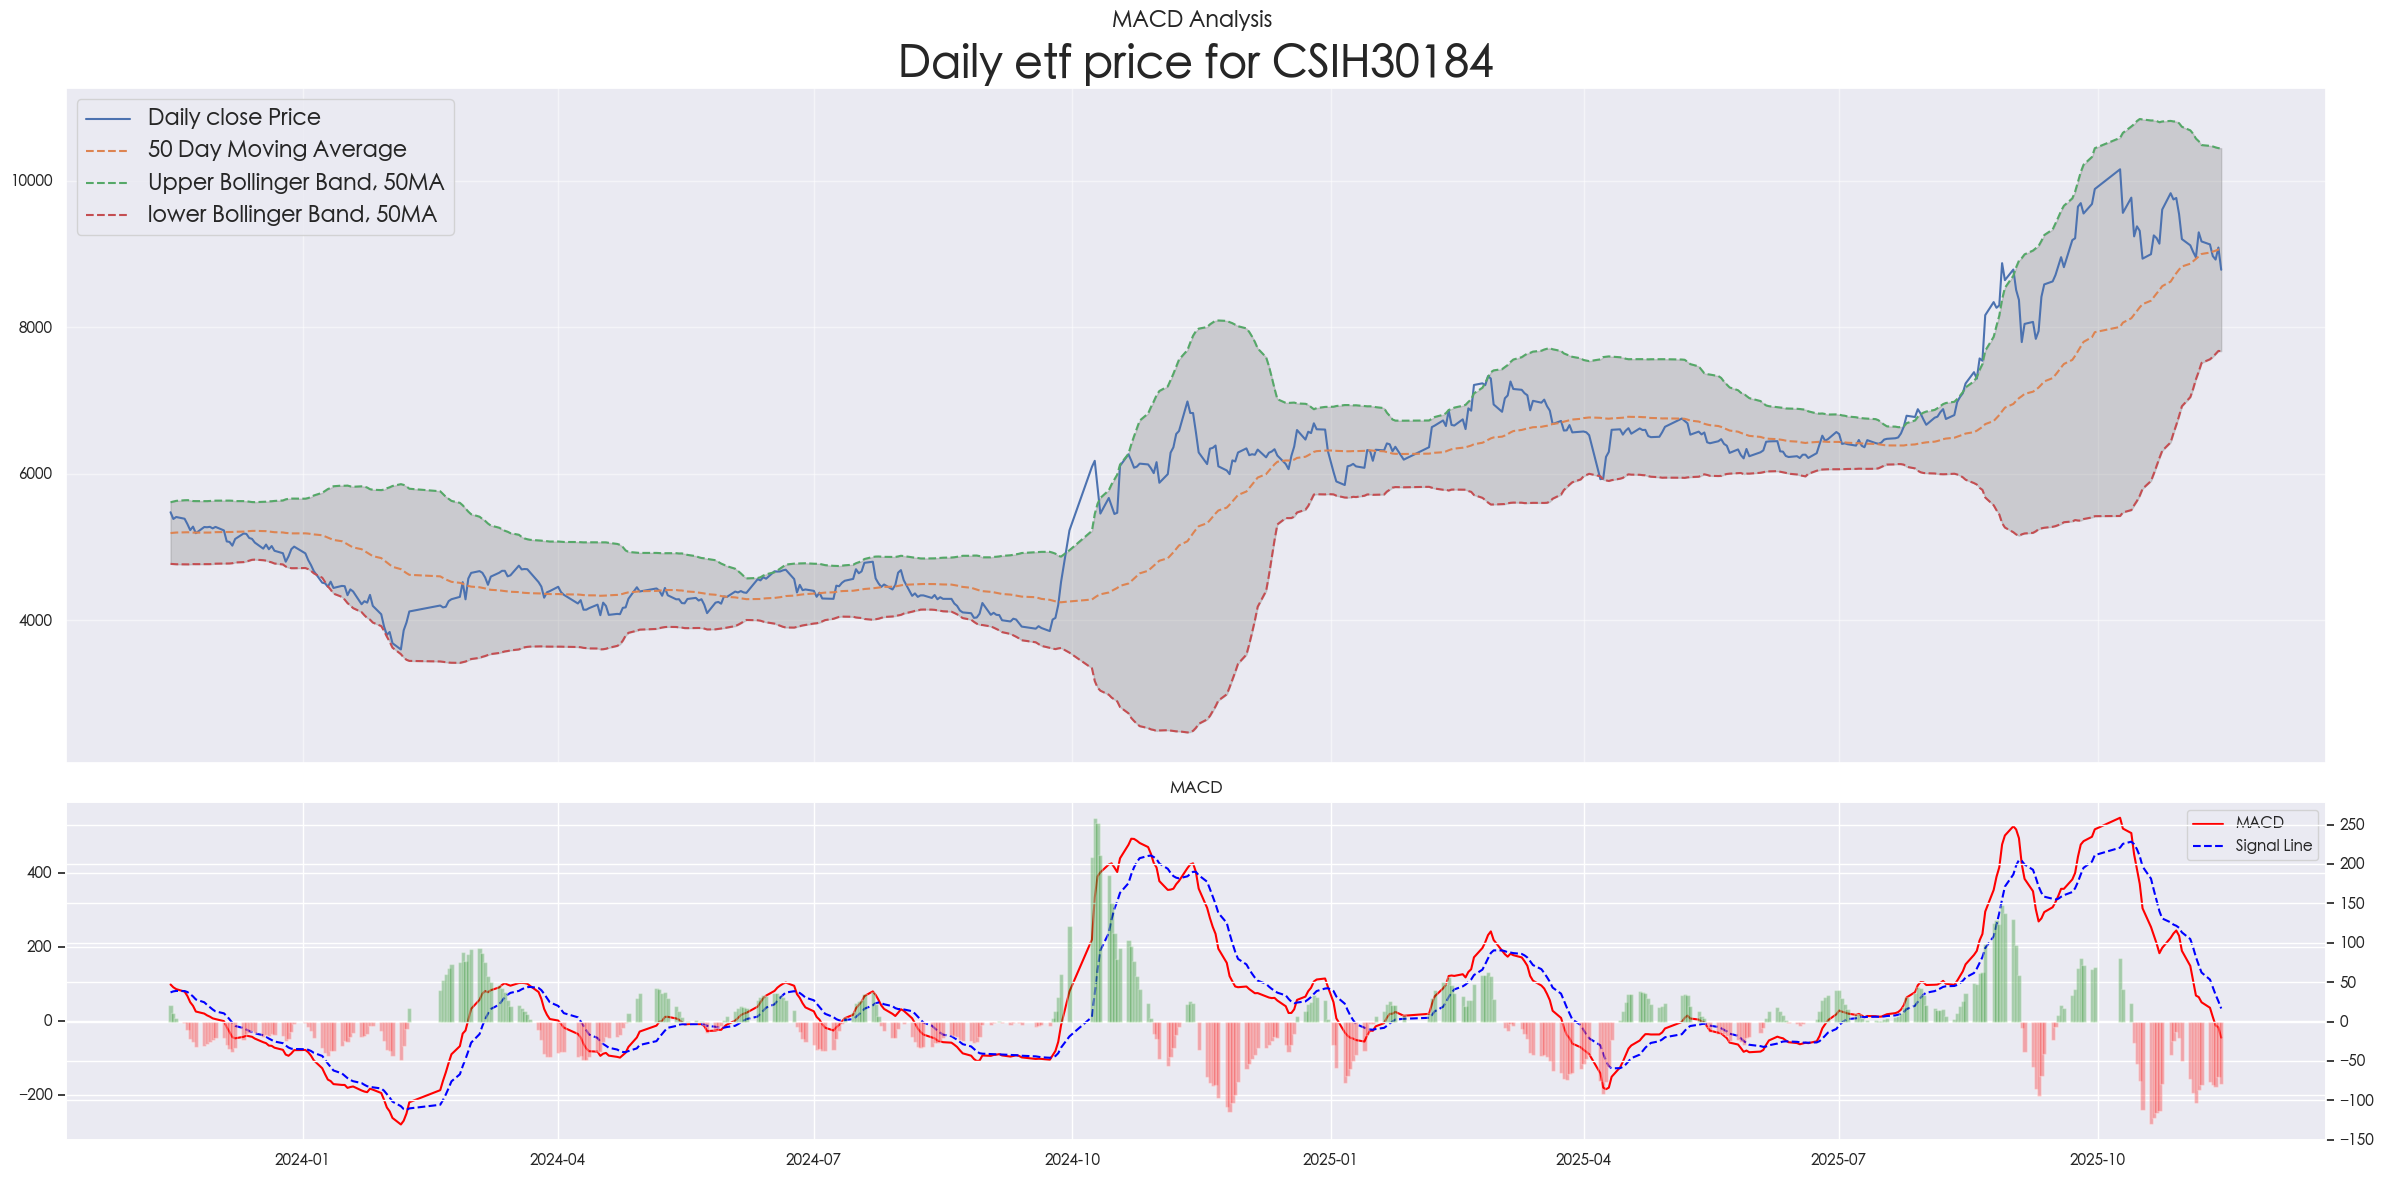

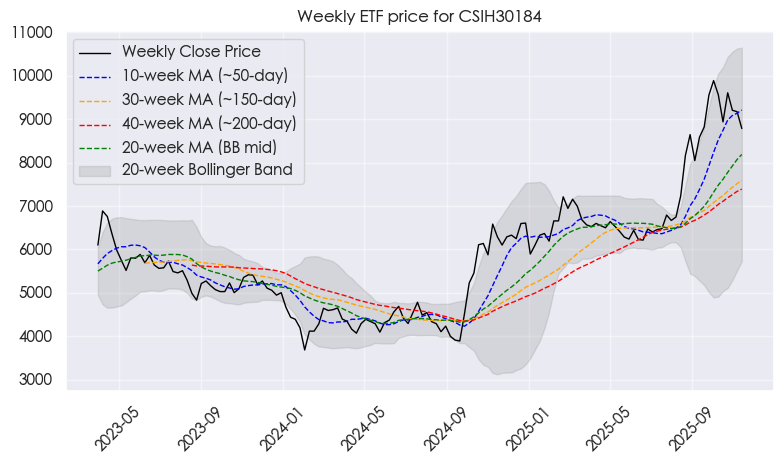

Current RSI: 42.37 
Current RSI raw: 26.15 
Current MACD Divergence: -80.0335 
Tomorrow inferred RSI: 42.37 
Tomorrow inferred RSI raw: 25.41 
Tomorrow inferred MACD Divergence: -76.7908 
Latest anchored VWAP since 2025-07-01 is 8436.763969910086


/Users/yuchen/Documents/GitHub/trading_strategy/notebooks/../src/chinese_index_etf_strategy.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anchored_df['tp'] = (anchored_df['high'] + anchored_df['low'] + anchored_df['close']) / 3
/Users/yuchen/Documents/GitHub/trading_strategy/notebooks/../src/chinese_index_etf_strategy.py:340: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anchored_df['pv'] = anchored_df['tp'] * anchored_df['volume']


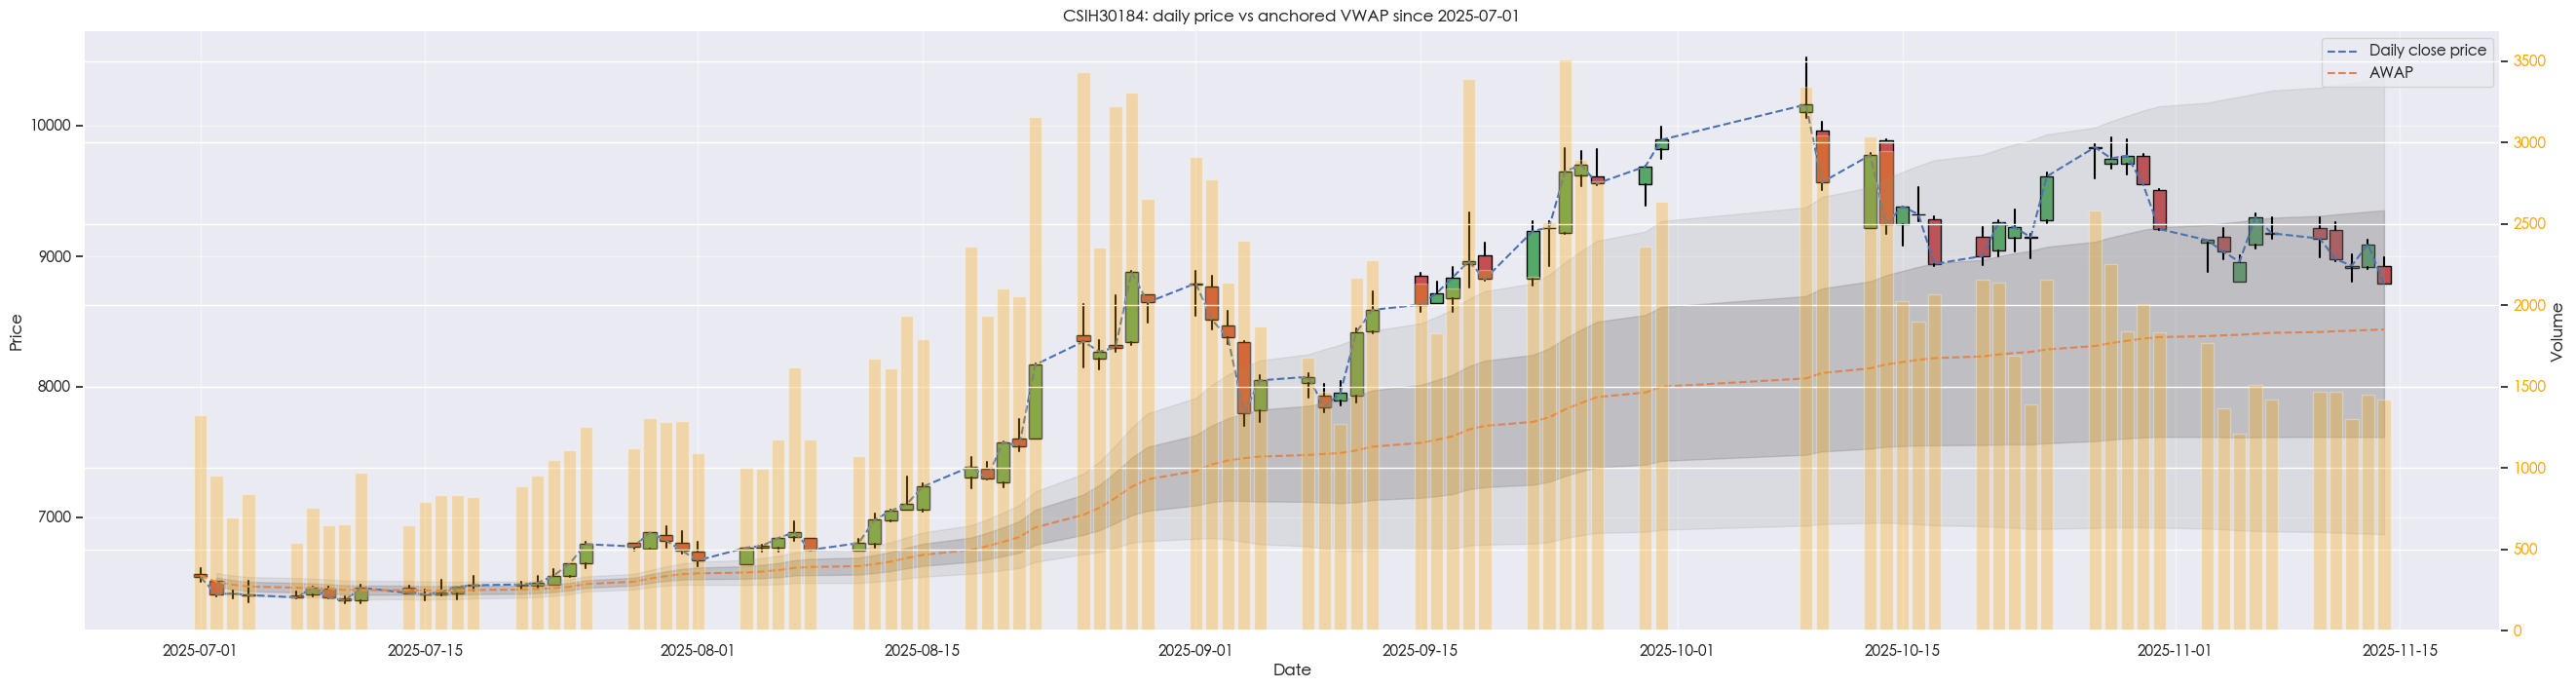

Latest 5D VWAP: 9004.851987289088
Latest 10D VWAP: 9051.726285603661
Latest 20D VWAP: 9282.709456730909
Latest 50D VWAP: 9119.828437575636
Latest 200D VWAP: 7677.446152263902


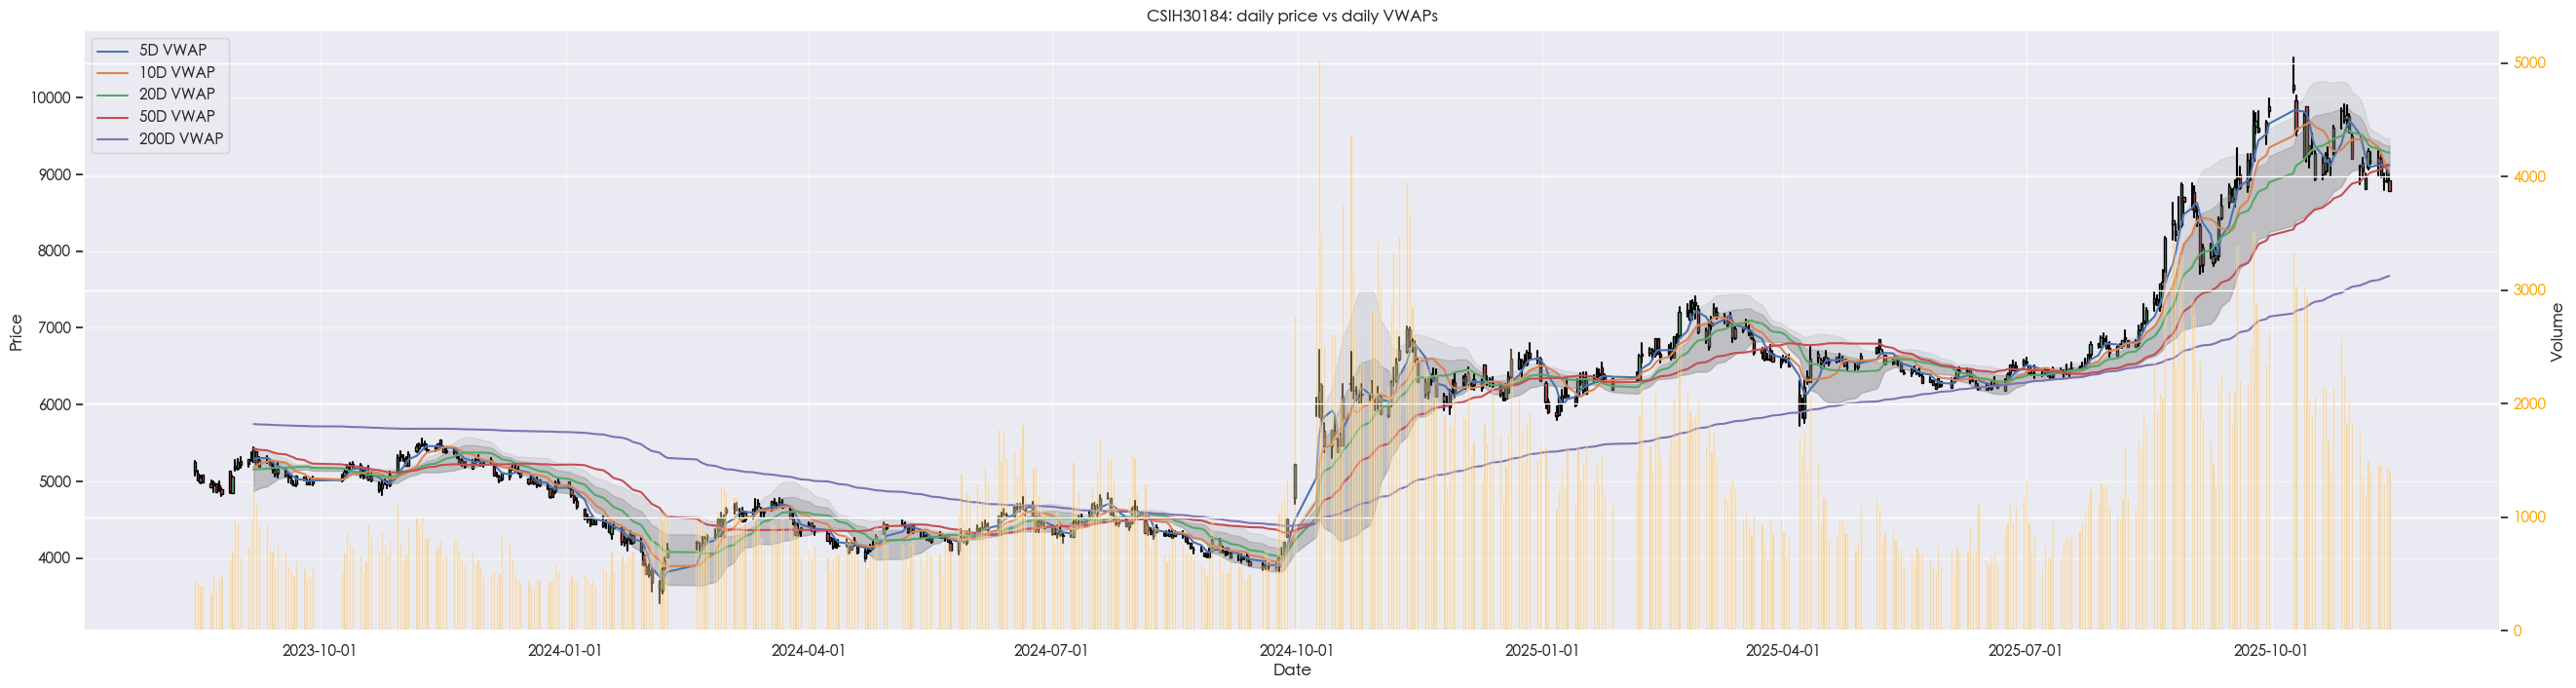

In [41]:
# 中证全指半导体指数
# etf_code = "csi931865" # 中证半导体
etf_code = 'CSIH30184'
try:
    stg = etf_strategy(etf_code, source="index")
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    stg.calculate_anchored_vwap(start_date='2025-07-01')
    stg.plot_daily_vwap()
except:
    pass

* Current etf price: 5767.56
* Recent high: 6209.67
* Current etf price is at 92.88% of recent high
Latest 5 Day MA: 5786.79
Latest 5 Day EMA: 5775.33
Latest 20 Day MA: 5702.52
Latest lower Bollinger Band, 20MA: 5579.88
Latest higher Bollinger Band, 20MA: 5825.16
Latest 50 Day MA: 5591.37
Latest lower Bollinger Band, 50MA: 5321.49
Latest higher Bollinger Band, 50MA: 5861.26
Latest 50 Day EMA: 5631.46
Latest 120 Day MA: 5547.43
Latest 200 Day MA: 5477.2
Latest 200 Day EMA: 5506.61
Latest 10 Week MA: 5587.34
Latest 20 Week MA: 5569.5
Latest 30 Week MA: 5519.58
Latest 40 Week MA: 5483.0
Latest Lower Weekly Bollinger Band, 20MA: 5393.77
Latest Higher Weekly Bollinger Band, 20MA: 5745.23

Latest RSI: 63.86 
Latest RSI, raw: 64.72 
Latest MACD Divergence: 5.9433 
5MA crosses 20MA at 5205.75
20MA crosses 50MA at 2062.71
5MA break point: 5791.6
20MA break point: 5699.09
20MA lower Bollinger Band break point: 5557.41
20MA Upper Bollinger Band break point: 5840.78
50MA break point: 5587.78
50MA 

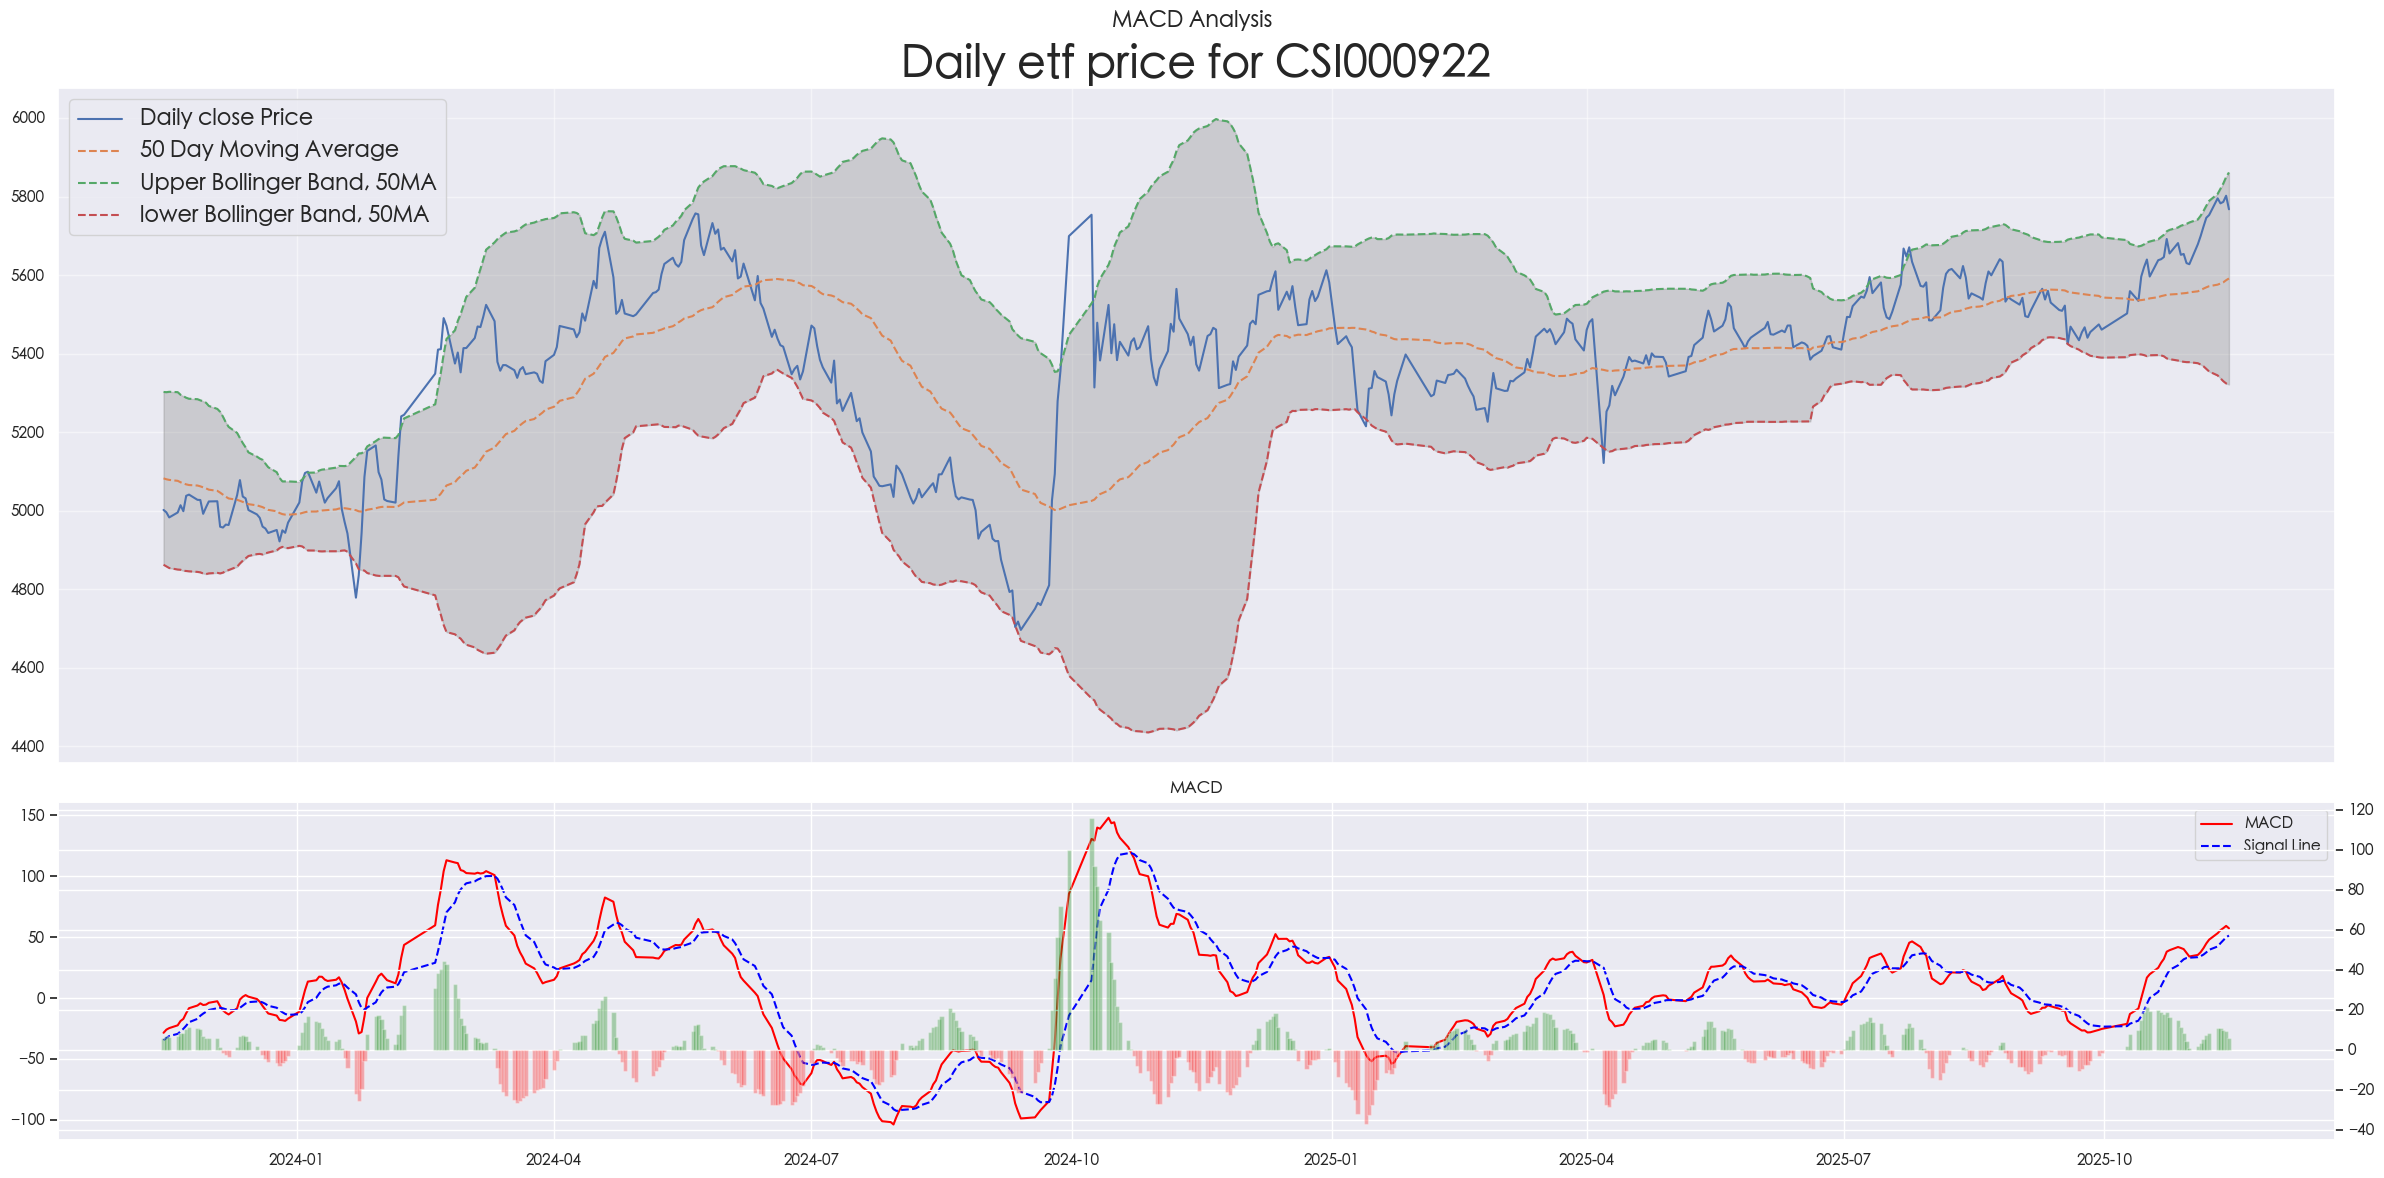

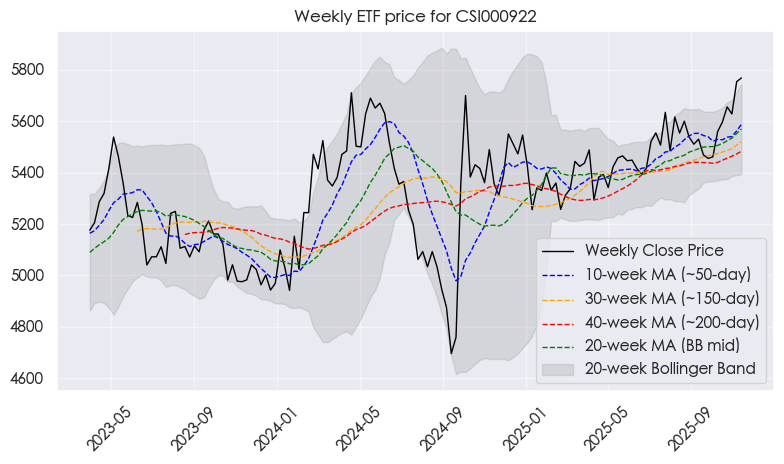

Current RSI: 63.86 
Current RSI raw: 72.08 
Current MACD Divergence: 3.0061 
Tomorrow inferred RSI: 63.86 
Tomorrow inferred RSI raw: 71.85 
Tomorrow inferred MACD Divergence: 0.5334 
Latest 5D VWAP: 5785.21669271192
Latest 10D VWAP: 5745.383668340911
Latest 20D VWAP: 5692.405812987358
Latest 50D VWAP: 5582.798858797255
Latest 200D VWAP: 5484.2700653651345


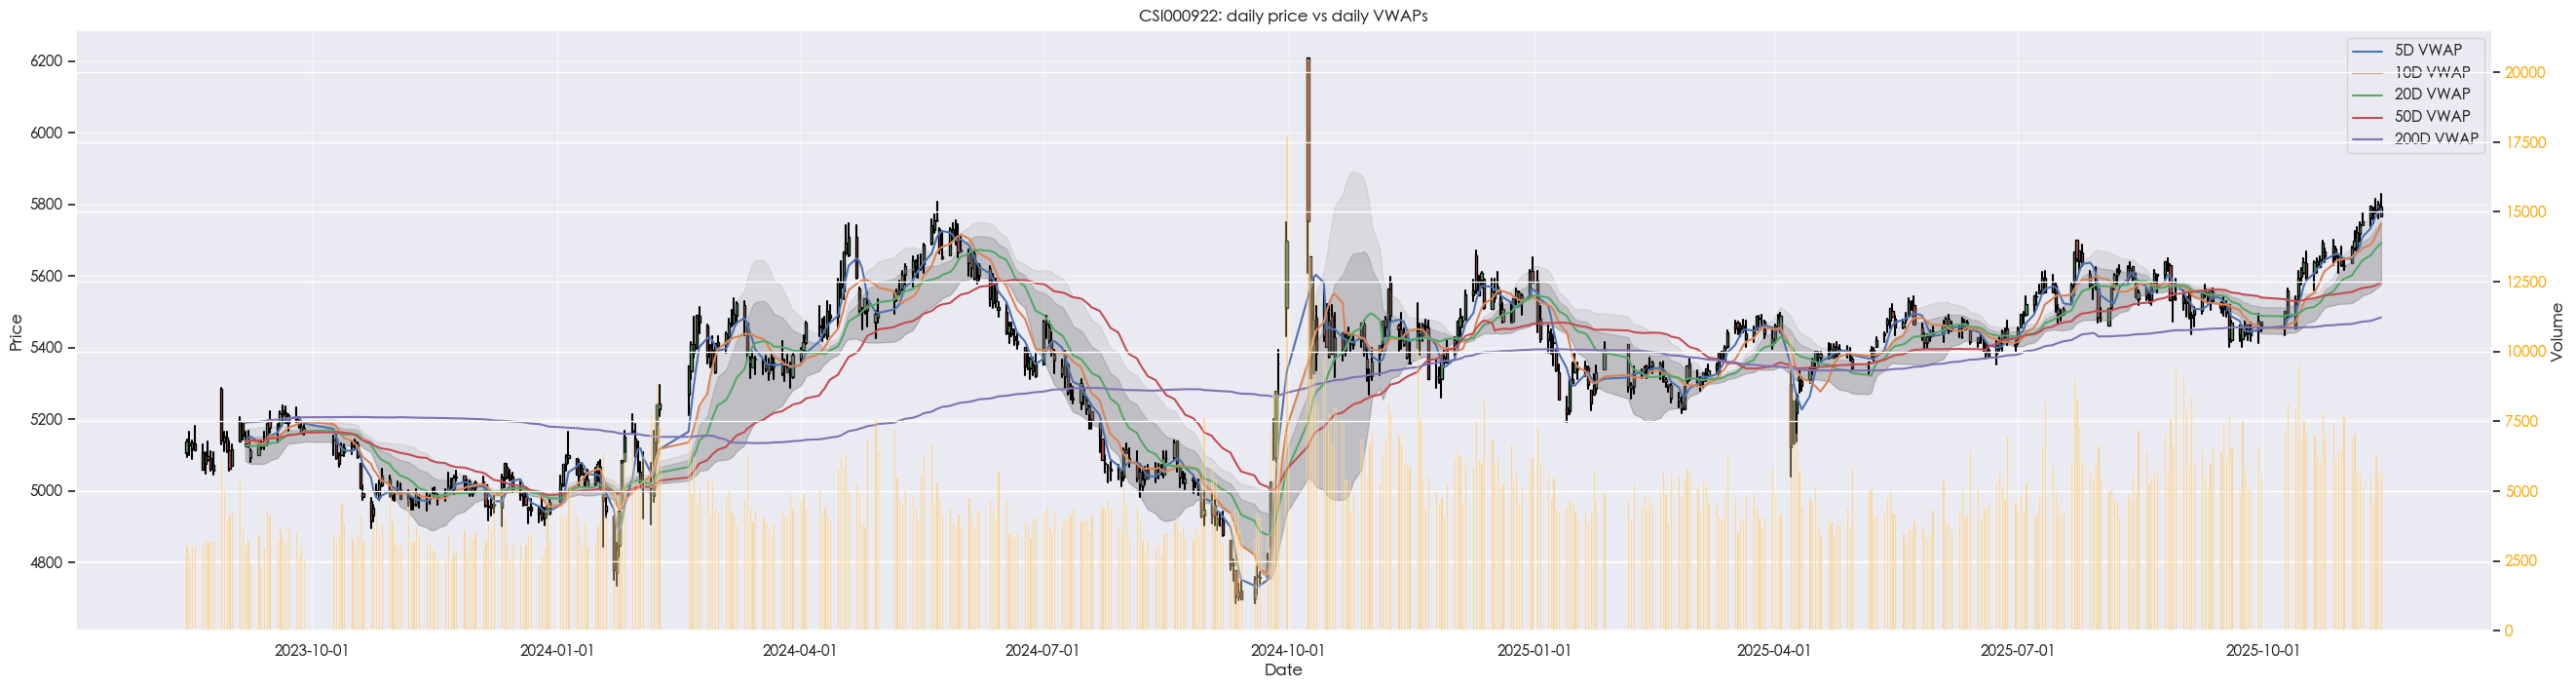

In [42]:
# 红利指数
etf_code = 'CSI000922' # same as SH000922, but CSI quicker to download
try:
    stg = etf_strategy(etf_code, source="index")
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    # stg.calculate_anchored_vwap(start_date='2025-07-01')
    stg.plot_daily_vwap()
except:
    pass

* Current etf price: 12047.32
* Recent high: nan
* Current etf price is at nan% of recent high
Latest 5 Day MA: 12087.14
Latest 5 Day EMA: 12062.73
Latest 20 Day MA: 11904.09
Latest lower Bollinger Band, 20MA: 11638.56
Latest higher Bollinger Band, 20MA: 12169.62
Latest 50 Day MA: 11648.16
Latest lower Bollinger Band, 50MA: 11037.55
Latest higher Bollinger Band, 50MA: 12258.76
Latest 50 Day EMA: 11727.19
Latest 120 Day MA: 11456.63
Latest 200 Day MA: 11169.54
Latest 200 Day EMA: 11262.58
Latest 10 Week MA: 11646.67
Latest 20 Week MA: 11572.19
Latest 30 Week MA: 11357.5
Latest 40 Week MA: 11202.54
Latest Lower Weekly Bollinger Band, 20MA: 11154.01
Latest Higher Weekly Bollinger Band, 20MA: 11990.37

Latest RSI: 64.96 
Latest RSI, raw: 65.15 
Latest MACD Divergence: 11.373 
5MA crosses 20MA at 10827.04
20MA crosses 50MA at 3516.08
5MA break point: 12097.09
20MA break point: 11896.56
20MA lower Bollinger Band break point: 11590.14
20MA Upper Bollinger Band break point: 12202.98
50MA break

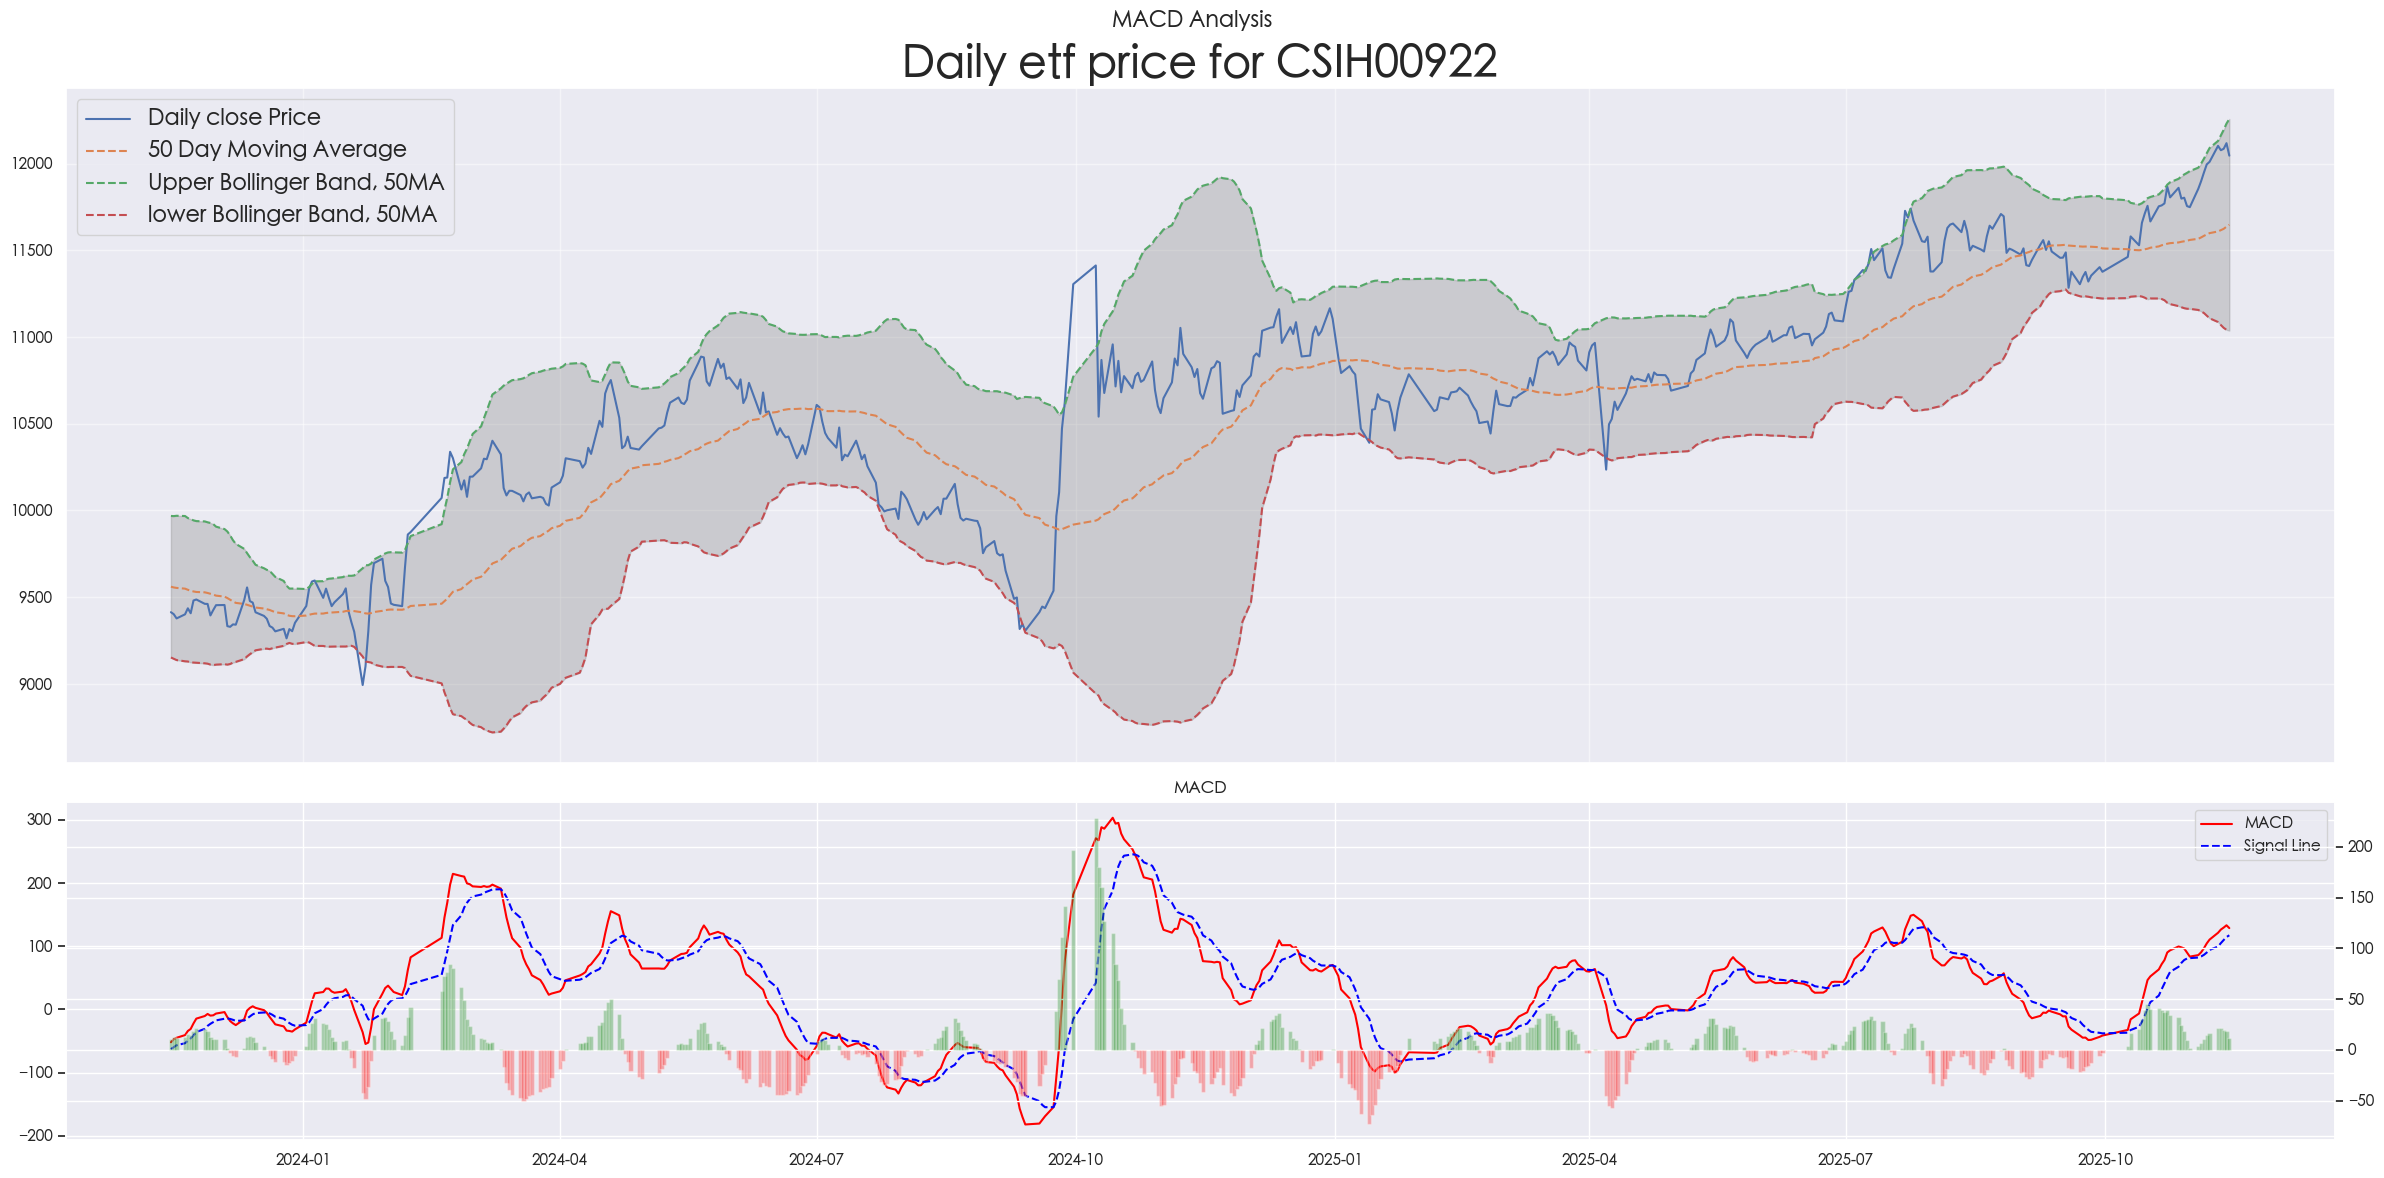

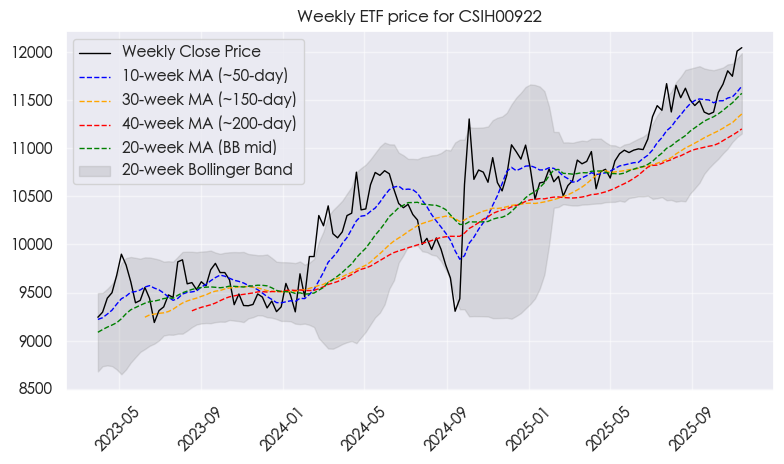

Current RSI: 64.96 
Current RSI raw: 72.52 
Current MACD Divergence: 5.1496 
Tomorrow inferred RSI: 64.96 
Tomorrow inferred RSI raw: 72.26 
Tomorrow inferred MACD Divergence: -0.1023 
Latest 5D VWAP: nan
Latest 10D VWAP: nan
Latest 20D VWAP: nan
Latest 50D VWAP: nan
Latest 200D VWAP: nan


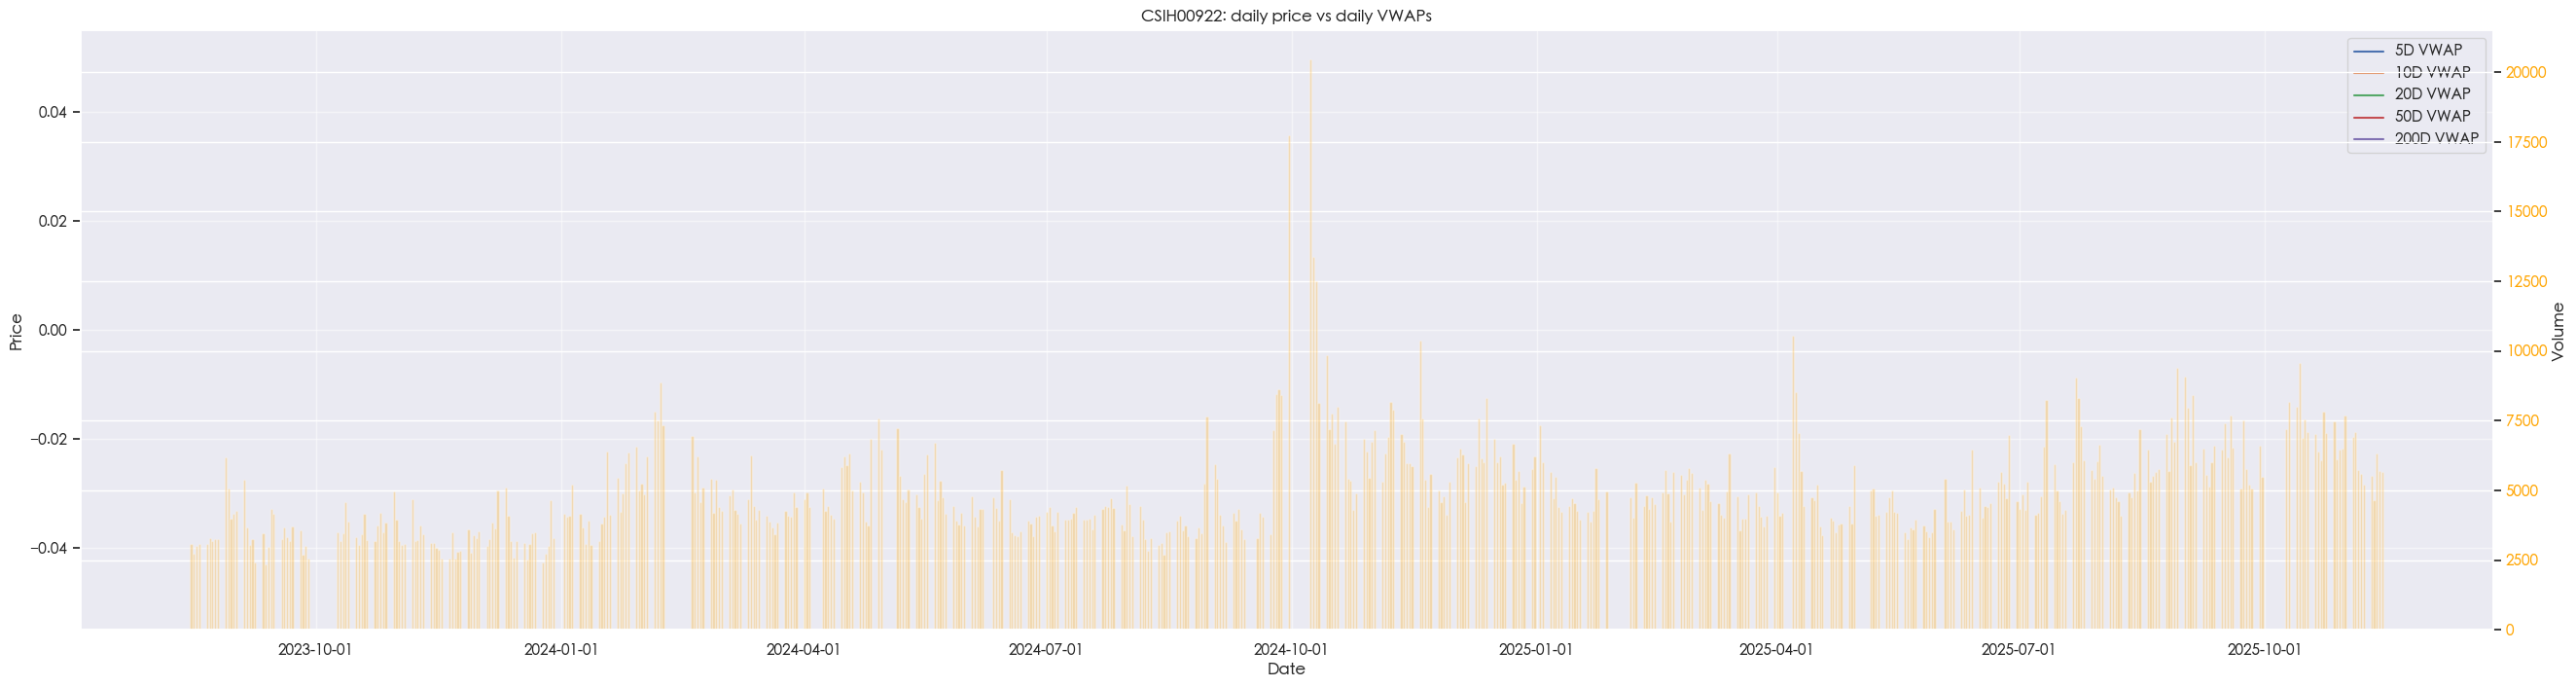

In [43]:
# 红利全收益指数
etf_code = 'csiH00922'
try:
    stg = etf_strategy(etf_code, source="index")
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    # stg.calculate_anchored_vwap(start_date='2025-07-01')
    stg.plot_daily_vwap()
except:
    pass

* Current etf price: 16333.64
* Recent high: 20813.32
* Current etf price is at 78.48% of recent high
Latest 5 Day MA: 16437.87
Latest 5 Day EMA: 16358.85
Latest 20 Day MA: 16145.88
Latest lower Bollinger Band, 20MA: 15736.9
Latest higher Bollinger Band, 20MA: 16554.86
Latest 50 Day MA: 16476.99
Latest lower Bollinger Band, 50MA: 15509.82
Latest higher Bollinger Band, 50MA: 17444.16
Latest 50 Day EMA: 16300.49
Latest 120 Day MA: 16177.87
Latest 200 Day MA: 16113.59
Latest 200 Day EMA: 16240.88
Latest 10 Week MA: 16366.49
Latest 20 Week MA: 16240.22
Latest 30 Week MA: 16175.83
Latest 40 Week MA: 16168.06
Latest Lower Weekly Bollinger Band, 20MA: 15377.94
Latest Higher Weekly Bollinger Band, 20MA: 17102.5

Latest RSI: 52.52 
Latest RSI, raw: 59.02 
Latest MACD Divergence: 66.2225 
5MA crosses 20MA at 14387.0
20MA crosses 50MA at 27370.75
5MA break point: 16463.93
20MA break point: 16135.99
20MA lower Bollinger Band break point: 15659.57
20MA Upper Bollinger Band break point: 16612.42
50M

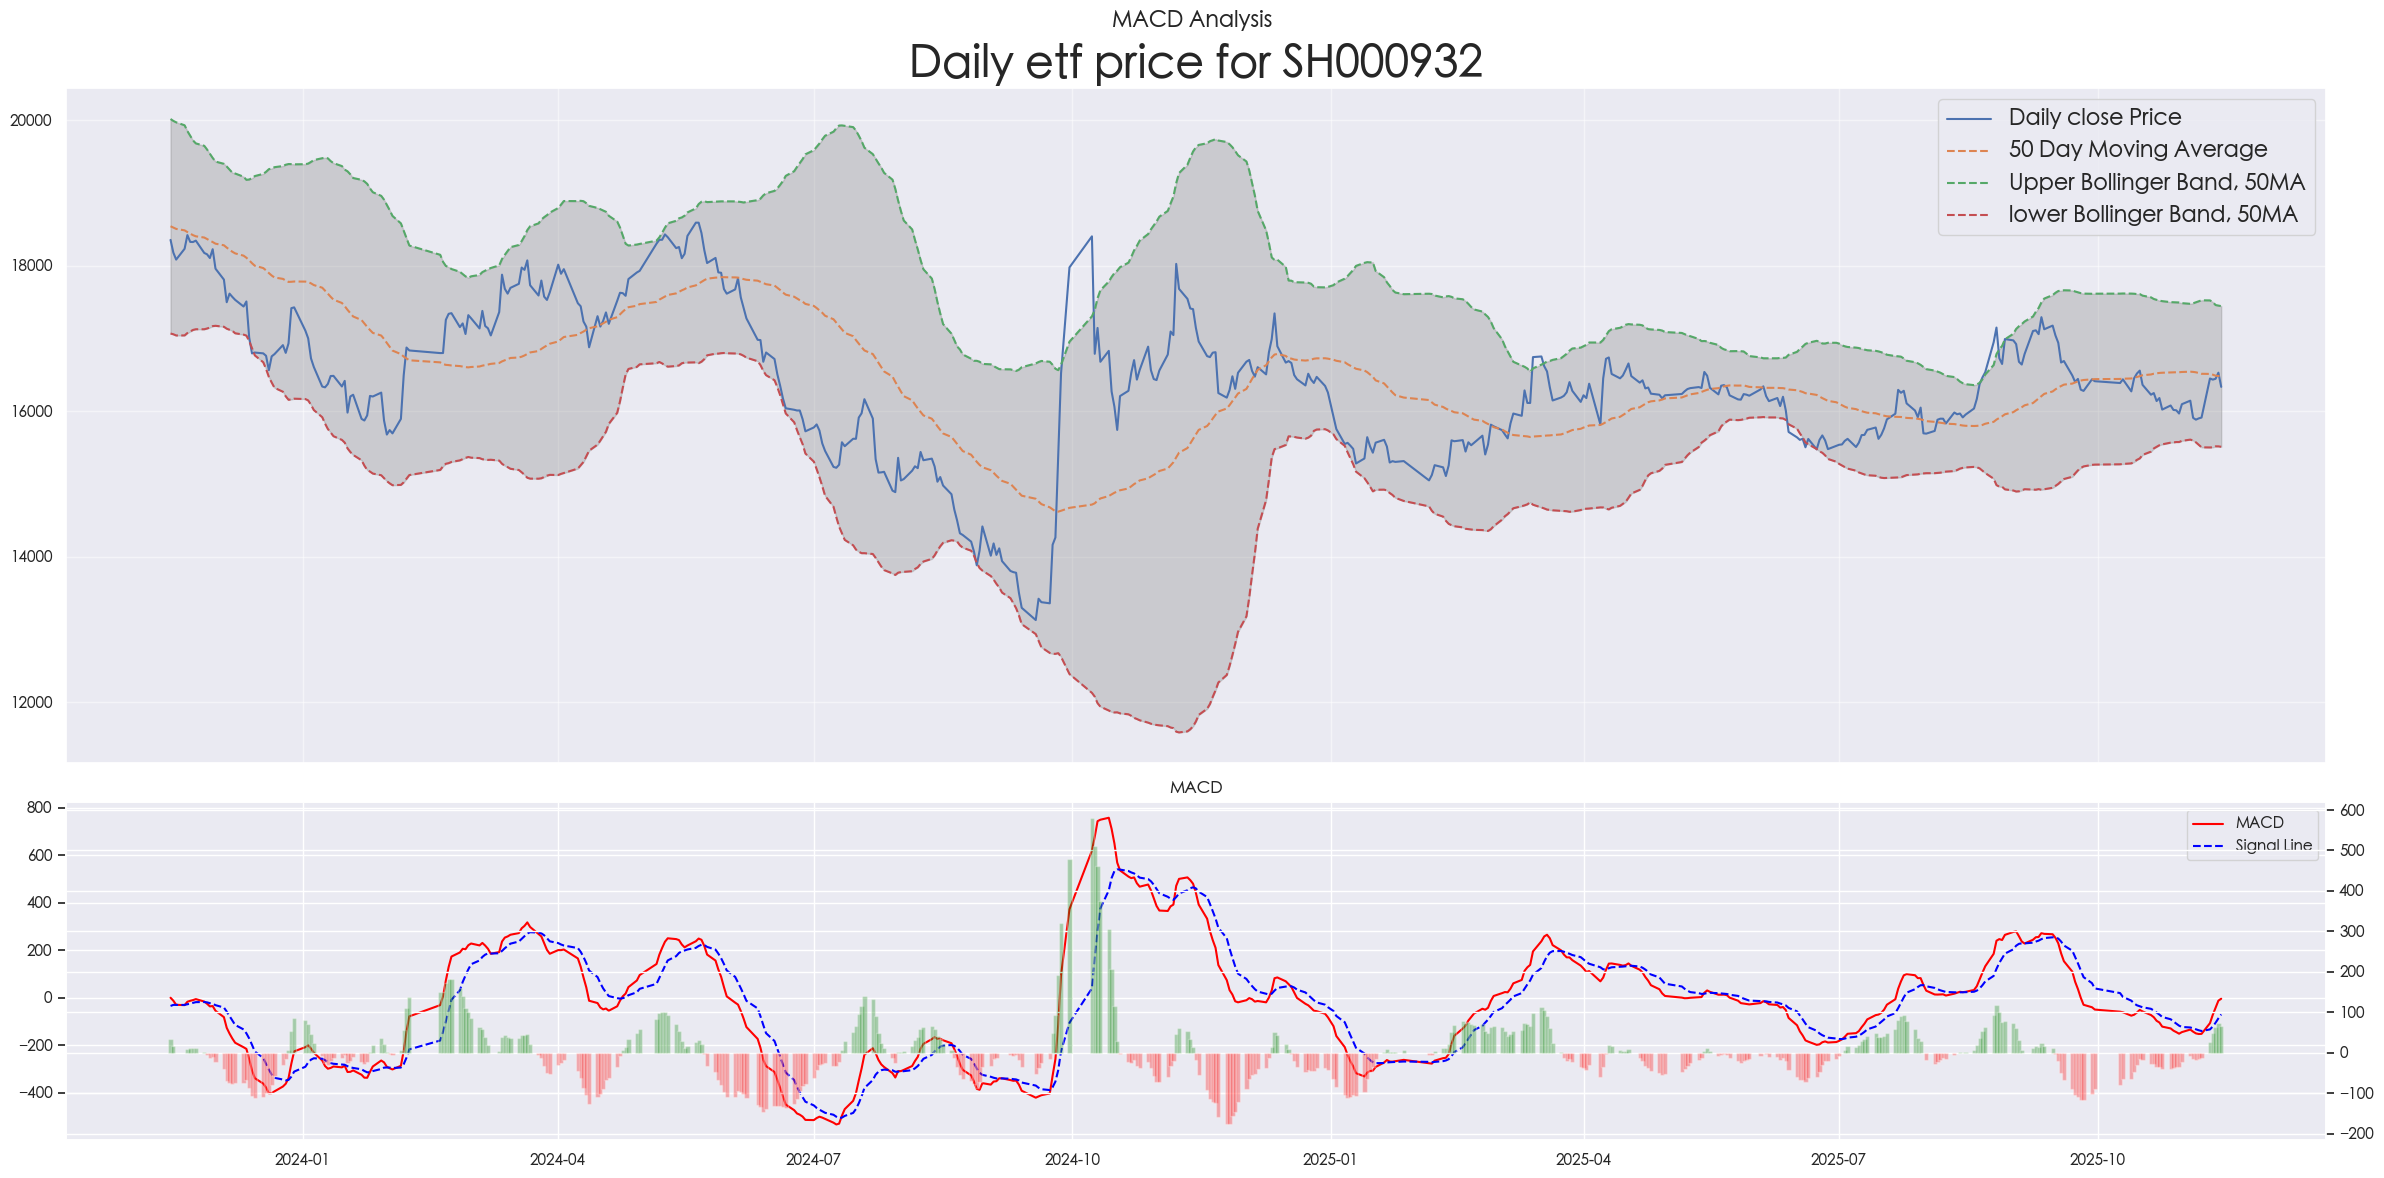

Current RSI: 52.52 
Current RSI raw: 61.68 
Current MACD Divergence: 58.1895 
Tomorrow inferred RSI: 52.52 
Tomorrow inferred RSI raw: 61.88 
Tomorrow inferred MACD Divergence: 50.6148 


In [44]:
# 中证消费
# support 15981.93681818 weak, 15523.16432432 fine, 15025.058125 strong
etf_code = 'sh000932'
try:
    stg = etf_strategy(etf_code, source="index")
    stg.output()
    # stg.plot_weekly_chart() # not useful
    stg.latest_metric()
    stg.infer_metric()
    # stg.calculate_anchored_vwap(start_date='2025-07-01')
    # stg.plot_daily_vwap() # nothing can support...
    # stg.atr_drawdown_thresholds() # use this after breakout to confirm
except:
    pass

* Current etf price: 3111.51
* Recent high: 3331.86
* Current etf price is at 93.39% of recent high
Latest 5 Day MA: 3149.69
Latest 5 Day EMA: 3151.33
Latest 20 Day MA: 3164.38
Latest lower Bollinger Band, 20MA: 3007.51
Latest higher Bollinger Band, 20MA: 3321.24
Latest 50 Day MA: 3091.74
Latest lower Bollinger Band, 50MA: 2780.18
Latest higher Bollinger Band, 50MA: 3403.31
Latest 50 Day EMA: 3030.08
Latest 120 Day MA: 2600.56
Latest 200 Day MA: 2397.12
Latest 200 Day EMA: 2532.74
Latest 10 Week MA: 3122.86
Latest 20 Week MA: 2796.54
Latest 30 Week MA: 2536.98
Latest 40 Week MA: 2434.87
Latest Lower Weekly Bollinger Band, 20MA: 2011.08
Latest Higher Weekly Bollinger Band, 20MA: 3582.0

Latest RSI: 48.4 
Latest RSI, raw: 40.85 
Latest MACD Divergence: -15.174 
5MA crosses 20MA at 3209.43
20MA crosses 50MA at 690.36
5MA break point: 3159.23
20MA break point: 3167.16
20MA lower Bollinger Band break point: 2982.38
20MA Upper Bollinger Band break point: 3351.94
50MA break point: 3091.34
50M

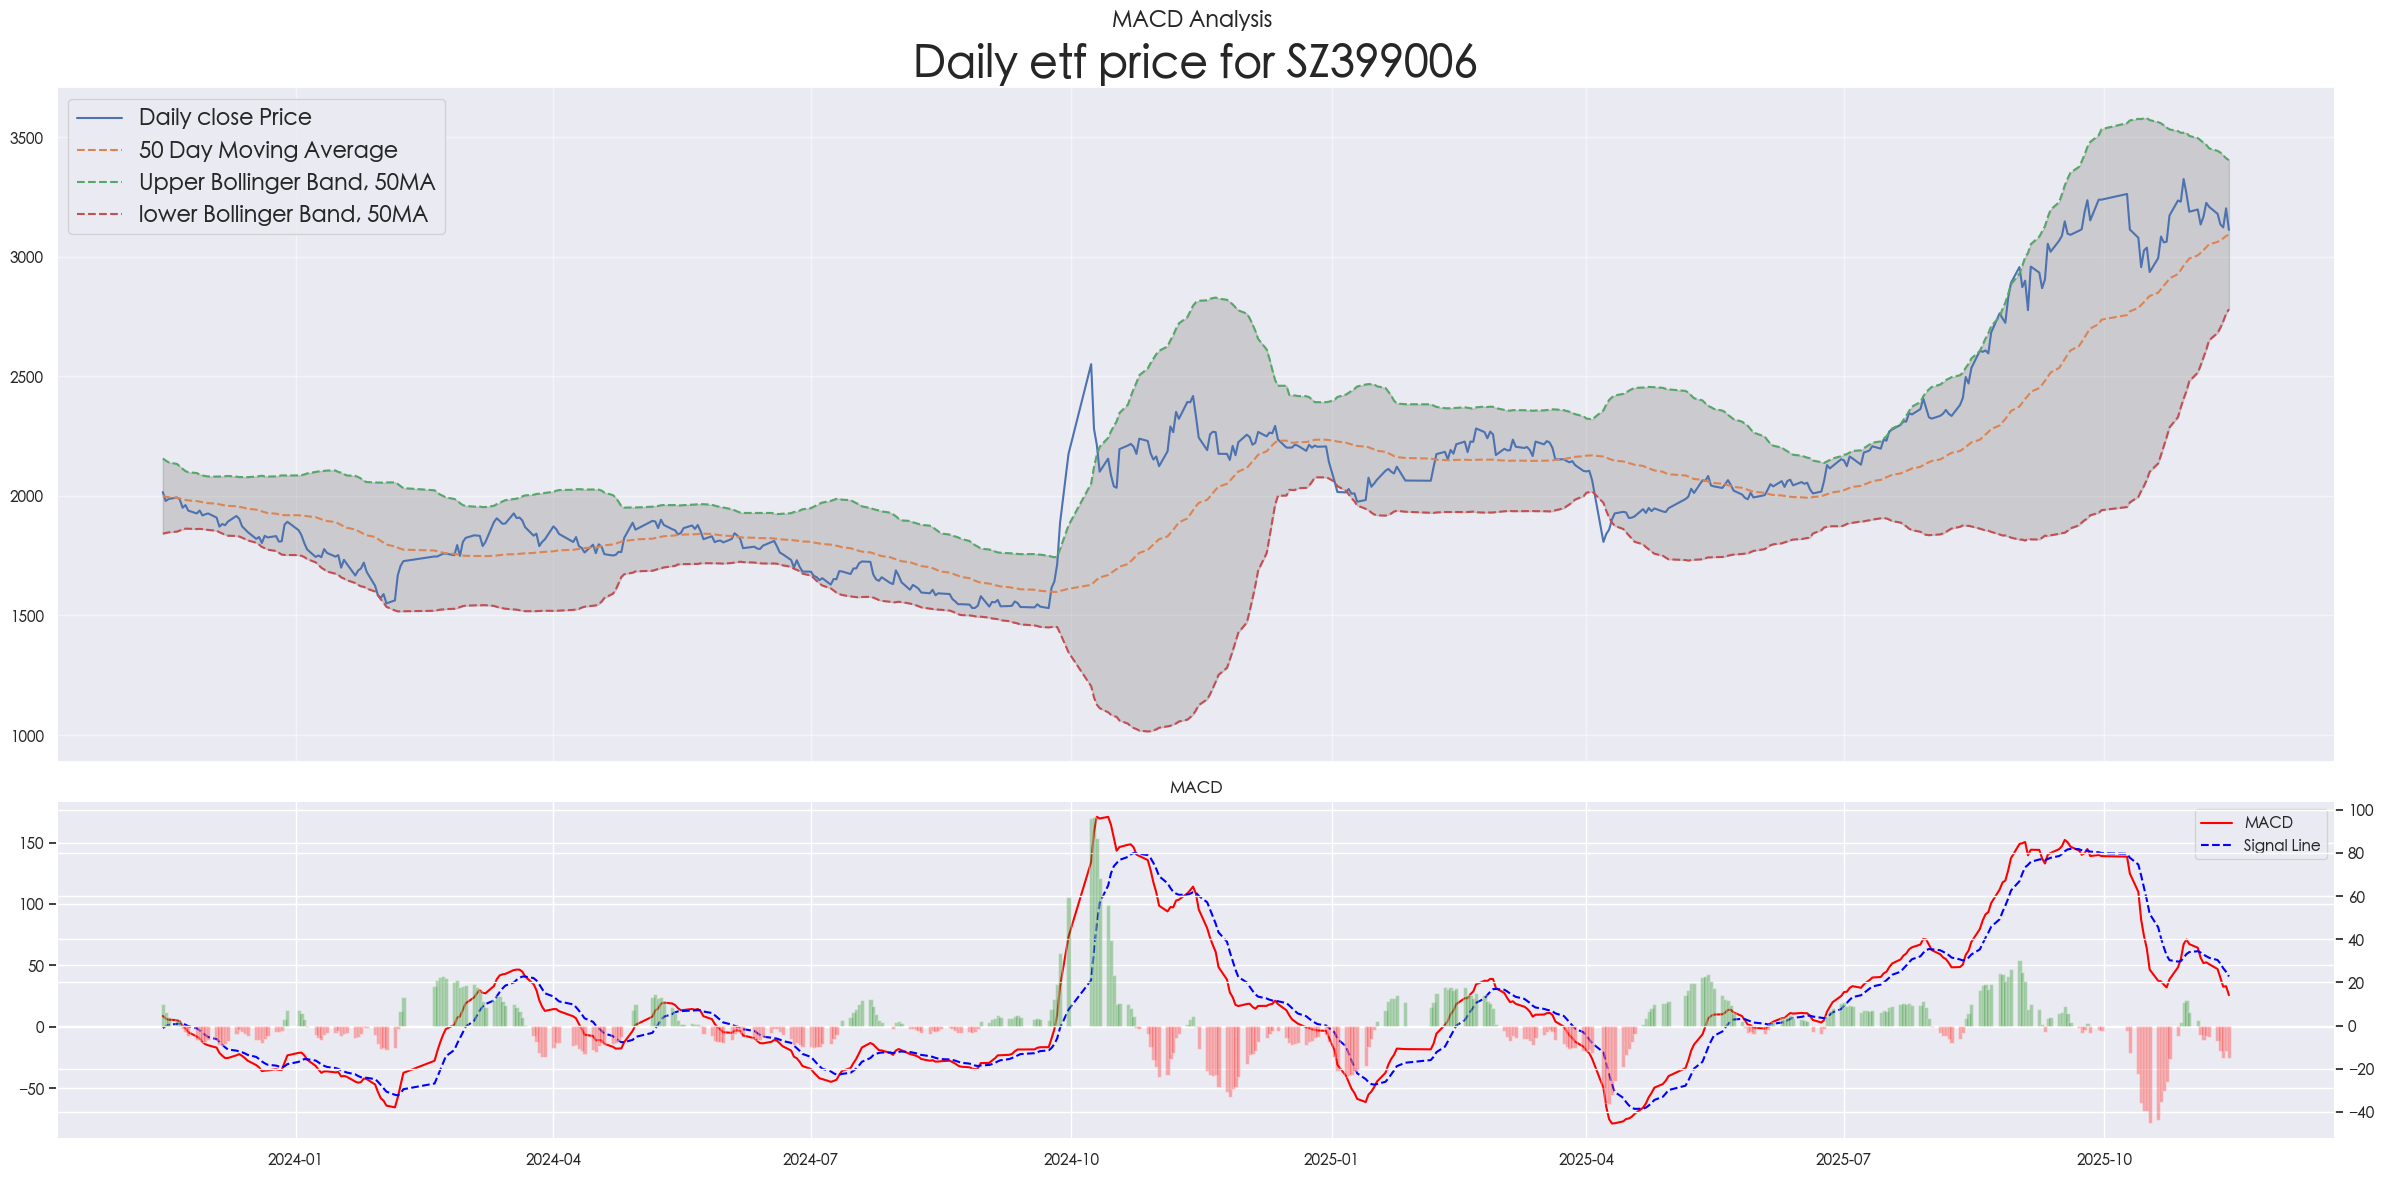

Current RSI: 48.4 
Current RSI raw: 41.14 
Current MACD Divergence: -16.919 
Tomorrow inferred RSI: 48.4 
Tomorrow inferred RSI raw: 31.4 
Tomorrow inferred MACD Divergence: -17.4604 


In [45]:
# 创业板指数
etf_code = 'sz399006'
try:
    stg = etf_strategy(etf_code, source="index")
    stg.output()
    # stg.plot_weekly_chart() # not useful
    stg.latest_metric()
    stg.infer_metric()
    # stg.calculate_anchored_vwap(start_date='2025-07-01')
    # stg.plot_daily_vwap() # nothing can support...
    # stg.atr_drawdown_thresholds() # use this after breakout to confirm
except:
    pass

* Current etf price: 5812.8
* Recent high: 6715.46
* Current etf price is at 86.56% of recent high
Latest 5 Day MA: 5913.61
Latest 5 Day EMA: 5894.83
Latest 20 Day MA: 5936.83
Latest lower Bollinger Band, 20MA: 5726.48
Latest higher Bollinger Band, 20MA: 6147.17
Latest 50 Day MA: 6068.64
Latest lower Bollinger Band, 50MA: 5423.04
Latest higher Bollinger Band, 50MA: 6714.25
Latest 50 Day EMA: 5962.17
Latest 120 Day MA: 5694.76
Latest 200 Day MA: 5549.81
Latest 200 Day EMA: 5488.65
Latest 10 Week MA: 6073.99
Latest 20 Week MA: 5791.58
Latest 30 Week MA: 5597.95
Latest 40 Week MA: 5576.43
Latest Lower Weekly Bollinger Band, 20MA: 5061.92
Latest Higher Weekly Bollinger Band, 20MA: 6521.25

Latest RSI: 42.84 
Latest RSI, raw: 38.8 
Latest MACD Divergence: -3.5827 
5MA crosses 20MA at 5967.59
20MA crosses 50MA at 10206.71
5MA break point: 5938.81
20MA break point: 5943.35
20MA lower Bollinger Band break point: 5702.25
20MA Upper Bollinger Band break point: 6184.45
50MA break point: 6073.86
5

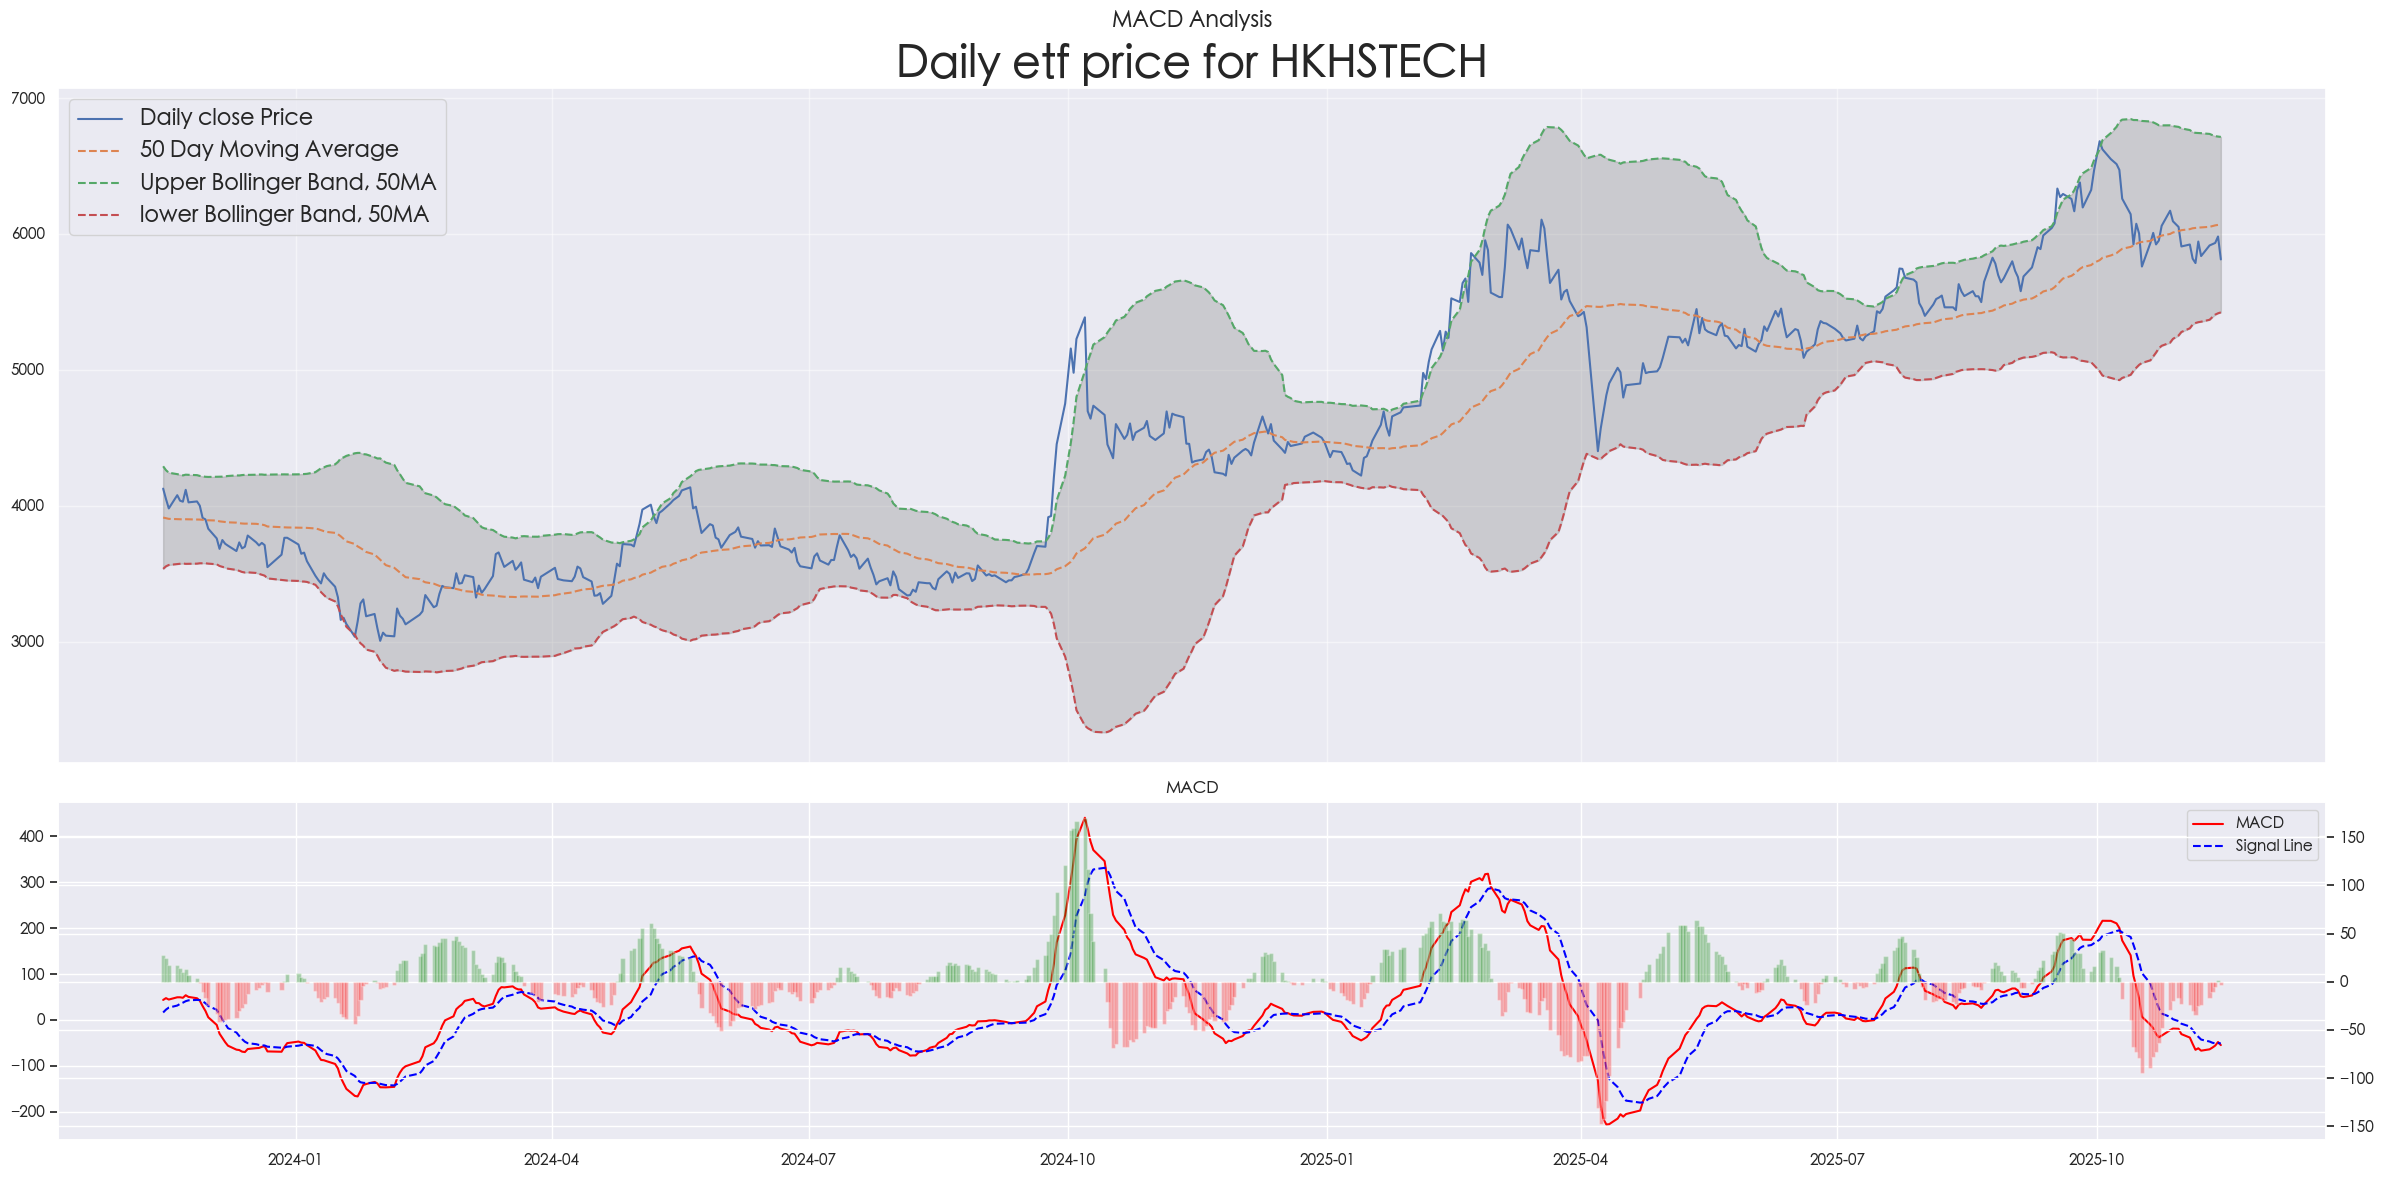

Current RSI: 42.84 
Current RSI raw: 31.94 
Current MACD Divergence: -6.6031 
Tomorrow inferred RSI: 42.84 
Tomorrow inferred RSI raw: 34.65 
Tomorrow inferred MACD Divergence: -7.6684 


In [46]:
# 恒生科技
etf_code = 'HKHSTECH'
try:
    stg = etf_strategy(etf_code, source='index')
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

* Current etf price: 26572.46
* Recent high: 27381.84
* Current etf price is at 97.04% of recent high
Latest 5 Day MA: 26782.74
Latest 5 Day EMA: 26703.91
Latest 20 Day MA: 26235.01
Latest lower Bollinger Band, 20MA: 25374.57
Latest higher Bollinger Band, 20MA: 27095.45
Latest 50 Day MA: 26263.03
Latest lower Bollinger Band, 50MA: 25010.06
Latest higher Bollinger Band, 50MA: 27516.0
Latest 50 Day EMA: 26115.73
Latest 120 Day MA: 25254.05
Latest 200 Day MA: 24179.47
Latest 200 Day EMA: 24185.94
Latest 10 Week MA: 26262.09
Latest 20 Week MA: 25568.1
Latest 30 Week MA: 24815.03
Latest 40 Week MA: 24348.94
Latest Lower Weekly Bollinger Band, 20MA: 23829.86
Latest Higher Weekly Bollinger Band, 20MA: 27306.34

Latest RSI: 53.45 
Latest RSI, raw: 56.06 
Latest MACD Divergence: 77.5247 
5MA crosses 20MA at 22920.92
20MA crosses 50MA at 27506.62
5MA break point: 26835.31
20MA break point: 26217.25
20MA lower Bollinger Band break point: 25208.3
20MA Upper Bollinger Band break point: 27226.19
50M

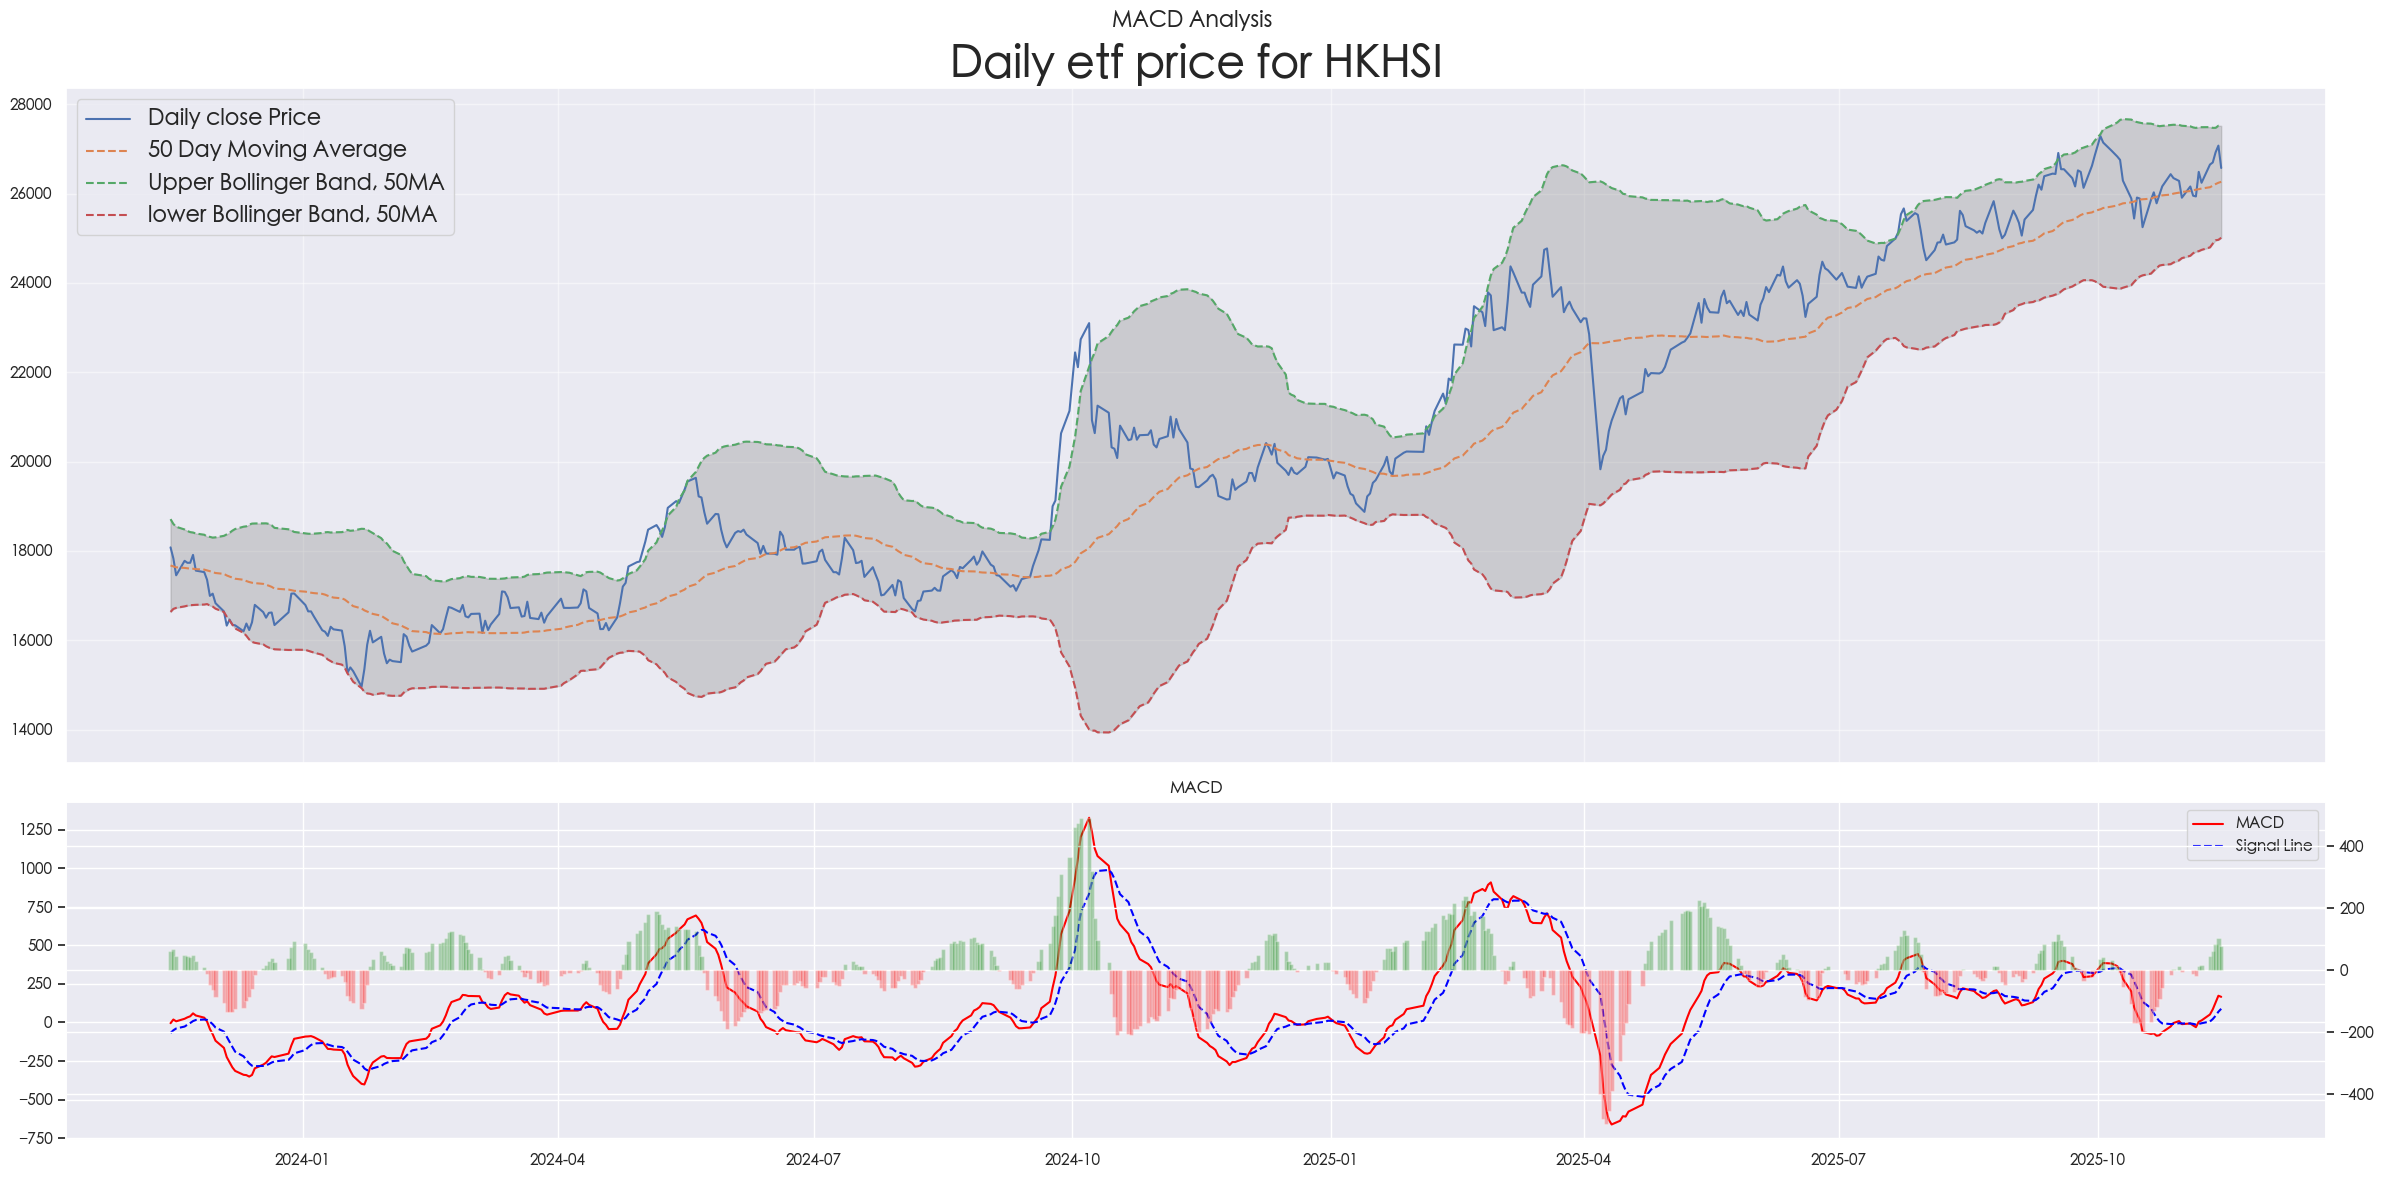

Current RSI: 53.45 
Current RSI raw: 52.22 
Current MACD Divergence: 56.0943 
Tomorrow inferred RSI: 53.45 
Tomorrow inferred RSI raw: 53.72 
Tomorrow inferred MACD Divergence: 38.7826 


In [47]:
# 恒生
etf_code = 'HKHSI'
try:
    stg = etf_strategy(etf_code, source='index')
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

* Current etf price: 2724.97
* Recent high: 2781.11
* Current etf price is at 97.98% of recent high
Latest 5 Day MA: 2748.99
Latest 5 Day EMA: 2742.85
Latest 20 Day MA: 2722.66
Latest lower Bollinger Band, 20MA: 2661.32
Latest higher Bollinger Band, 20MA: 2784.01
Latest 50 Day MA: 2700.79
Latest lower Bollinger Band, 50MA: 2583.14
Latest higher Bollinger Band, 50MA: 2818.44
Latest 50 Day EMA: 2682.62
Latest 120 Day MA: 2535.34
Latest 200 Day MA: 2432.18
Latest 200 Day EMA: 2462.18
Latest 10 Week MA: 2700.86
Latest 20 Week MA: 2588.69
Latest 30 Week MA: 2488.78
Latest 40 Week MA: 2441.72
Latest Lower Weekly Bollinger Band, 20MA: 2319.13
Latest Higher Weekly Bollinger Band, 20MA: 2858.25

Latest RSI: 51.11 
Latest RSI, raw: 45.55 
Latest MACD Divergence: 0.6953 
5MA crosses 20MA at 2549.45
20MA crosses 50MA at 1995.96
5MA break point: 2755.0
20MA break point: 2722.54
20MA lower Bollinger Band break point: 2649.36
20MA Upper Bollinger Band break point: 2795.72
50MA break point: 2700.3
50M

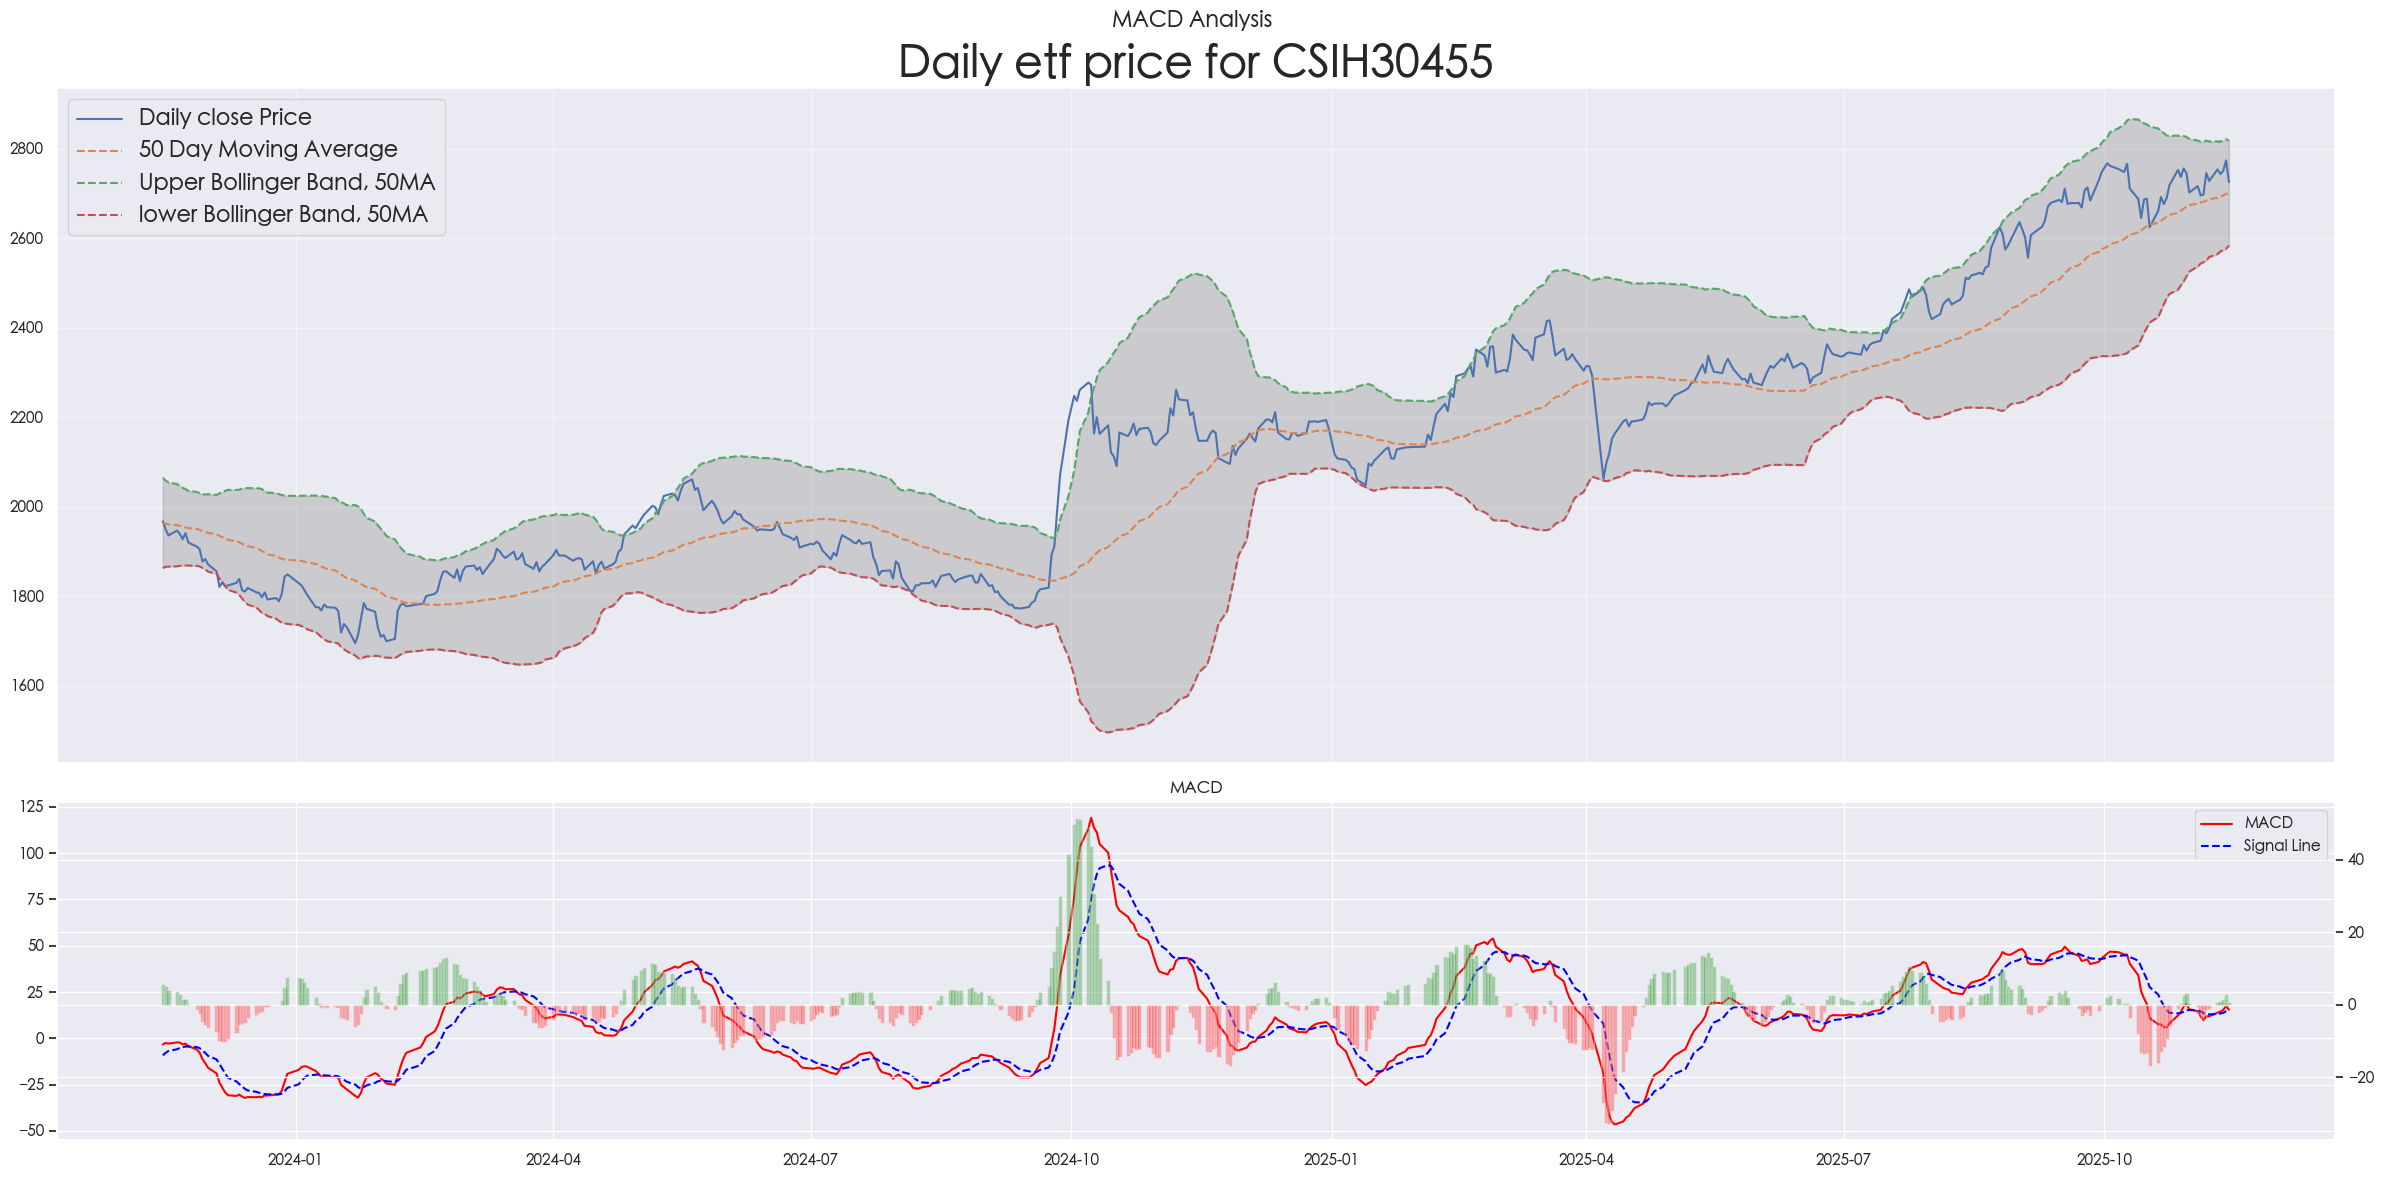

Current RSI: 51.11 
Current RSI raw: 48.02 
Current MACD Divergence: -0.9817 
Tomorrow inferred RSI: 51.11 
Tomorrow inferred RSI raw: 44.38 
Tomorrow inferred MACD Divergence: -2.1132 


In [48]:
# 50AH
etf_code = 'CSIH30455'
try:
    stg = etf_strategy(etf_code, source="index")
    stg.output()
    # stg.plot_weekly_chart() # not useful
    stg.latest_metric()
    stg.infer_metric()
    # stg.calculate_anchored_vwap(start_date='2025-07-01')
    # stg.plot_daily_vwap()
except:
    pass

### Test a "momentum driven" strategy

In [49]:
# def backtest_momentum_strategy(price_df, initial_cash=100_000, cycle=21, window=20, sell_early=False):
#     """
#     Backtest the momentum strategy with X-trading-day evaluation cycle.
#     Returns:
#         result_df: Daily portfolio value DataFrame
#         actions_df: Log of only buy/sell actions
#     """
#     price_df = price_df.sort_index()
    
#     # cycle-day moving average
#     ma = price_df.rolling(window=window).mean()
    
#     # cycle-day % change
#     pct_change = price_df.pct_change(cycle)
    
#     # Portfolio state
#     cash = initial_cash
#     shares = 0
#     current_stock = None
#     portfolio_values = []
#     actions = []

#     dates = price_df.index
    
#     # for i in range(cycle, len(dates)):  # start from the 22nd trading day
#     for i in range(cycle, 21*13):  # Check performance for one year
#         date = dates[i]
        
#         # Step (1): every cycle trading days, rebalance
#         if (i - cycle) % cycle == 0:
#             # Sell previous stock if any
#             if current_stock is not None:
#                 sell_price = price_df.loc[date, current_stock]
#                 cash += shares * sell_price
#                 actions.append([date, "SELL", current_stock, sell_price, shares])
#                 shares = 0
#                 current_stock = None
            
#             # Find candidates above ma
#             candidates = [s for s in price_df.columns 
#                           if price_df.loc[date, s] > ma.loc[date, s]]
            
#             if candidates:
#                 # Pick stock with largest cycle-day % change
#                 stock_changes = pct_change.loc[date, candidates]
#                 pick = stock_changes.idxmax()
#                 buy_price = price_df.loc[date, pick]
#                 current_stock = pick
#                 shares = cash // buy_price
#                 cash -= shares * buy_price
#                 actions.append([date, "BUY", pick, buy_price, shares])
        
#         # Step (2): sell early if price drops below ma
#         if sell_early and current_stock is not None:
#             if price_df.loc[date, current_stock] < ma.loc[date, current_stock]:
#                 sell_price = price_df.loc[date, current_stock]
#                 cash += shares * sell_price
#                 actions.append([date, "SELL_EARLY", current_stock, sell_price, shares])
#                 shares = 0
#                 current_stock = None
        
#         # Record portfolio value
#         if current_stock is not None:
#             value = cash + shares * price_df.loc[date, current_stock]
#         else:
#             value = cash
#         portfolio_values.append((date, value))
    
#     # Create results DataFrames
#     result_df = pd.DataFrame(portfolio_values, columns=["Date", "PortfolioValue"])
#     result_df.set_index("Date", inplace=True)
    
#     actions_df = pd.DataFrame(actions, columns=["Date", "Action", "Stock", "Price", "Shares"])
#     actions_df.set_index("Date", inplace=True)
    
#     total_days = len(result_df)
#     final_value = result_df["PortfolioValue"].iloc[-1]
#     annualized_return = (final_value / initial_cash) ** (252 / total_days) - 1
    
#     return result_df, actions_df, annualized_return


# def average_annualized_return(price_df, initial_cash=100_000, n_test=100, cycle=21, window=20, sell_early=False):
#     """
#     Runs the strategy from different starting offsets (0-20) and averages annualized return.
#     """
#     returns = []
#     for offset in range(n_test):  # 100 possible start offsets
#         sliced_df = price_df.iloc[offset:].copy()
#         if len(sliced_df) < 42:  # ensure enough data for lookback + holding
#             continue
#         _, _, ann_return = backtest_momentum_strategy(sliced_df, initial_cash, cycle=cycle, window=window, sell_early=sell_early)
#         returns.append(ann_return)
#     print(f"Average return: {np.mean(returns) if returns else np.nan}")
#     print(f"Return STD: {np.std(returns) if returns else np.nan}")

#     return returns

In [50]:
# etf_list = [
# "516570",
# "512820",
# "512260",
# "512480",
# "512580",
# "159948",
# "562500",
# "159819",
# "512600",
# "560880",
# "512400",
# # "159697", # history too short
# "515880",
# "516080",
# "159647",
# "515220",
# "512890",
# "512980",
# "159940",
# "516110",
# "513260",
# "513060",
# "513660",
# # "159545", # history too short
# "510050",
# ]
# etf_code = etf_list[0]

# df_all = ak.fund_etf_hist_em(
#             symbol=etf_code.upper(),
#             start_date=(datetime.today() - relativedelta(years=5)).strftime('%Y%m%d'),
#             end_date=datetime.today().strftime('%Y%m%d'),
#             period='daily',  # Default to daily,
#             adjust='qfq'
# )
# df_all = df_all[['日期','收盘']].set_index('日期')
# df_all = df_all.rename(columns={'收盘': etf_code})
# for etf_code in etf_list[1:]:
#     df = ak.fund_etf_hist_em(
#             symbol=etf_code.upper(),
#             start_date=(datetime.today() - relativedelta(years=5)).strftime('%Y%m%d'),
#             end_date=datetime.today().strftime('%Y%m%d'),
#             period='daily',  # Default to daily,
#             adjust='qfq'
#     )[['日期','收盘']].set_index('日期')
#     df = df.rename(columns={'收盘': etf_code})
#     df_all = pd.merge(df_all, df, left_index=True, right_index=True, how='inner')
# df_all

In [51]:
# returns = average_annualized_return(df_all, initial_cash=100000, cycle=21, window=50)

In [52]:
# returns = average_annualized_return(df_all, initial_cash=100000, cycle=21, window=20)

In [53]:
# result_df, actions_df, annualized_return = backtest_momentum_strategy(df_all, cycle=21, window=20)
# print(annualized_return)
# result_df

In [54]:
# actions_df

In [55]:
# # benchmark
# good_etfs = {
#     "honglidibo": "512890",
#     "hongli": "515180"}
# for etf in good_etfs:
#     etf_code = good_etfs[etf]
#     df_etf = etf_strategy(etf_code, start='20150101').return_result()
#     df_etf.set_index('date',inplace=True)
#     valid_start_range = range(0, len(df_etf) - 252)
#     start_points = np.random.choice(valid_start_range, size=800, replace=False)
#     returns = []
#     for start in start_points:
#         dates = df_etf.index
#         initial_date = dates[start]
#         end_date = dates[start + 252]
#         initial_price = df_etf.loc[initial_date]['close']
#         end_price = df_etf.loc[end_date]['close']
#         returns.append(end_price/initial_price - 1)
#     print(etf)
#     print(f"Average return: {np.mean(returns) if returns else np.nan}")
#     print(f"Return STD: {np.std(returns) if returns else np.nan}")
#     print(f"earning-cost ratio: {abs((np.mean(returns)+1.96*np.std(returns))/(np.mean(returns)-1.96*np.std(returns))) if returns else np.nan}")

### Regression

In [56]:
# 红利低波
etf_regression("512890", detailed=True)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
# 红利etf
etf_regression("515180", detailed=True)

In [ ]:
# 中证银行etf
etf_regression("512820", detailed=True)

### All weather strategy

In [ ]:
df = ak.stock_zh_a_hist(symbol="600900", period="daily", start_date="20180101", end_date='20251103', adjust="qfq")
df.rename(columns={"日期": 'date', "开盘": 'open', "收盘": 'close', "最高": 'high', "最低": 'low', "成交量": 'volume', "成交额": 'amount'}, inplace=True)

df['date'] = pd.to_datetime(df['date'])
df['max_price'] = df['high'].cummax()
df['drawdown'] = (df['low'] - df['max_price']) / df['max_price']

max_drawdown_row = df.loc[df['drawdown'].idxmin()]
max_drawdown = max_drawdown_row['drawdown']

peak_date = df.loc[:max_drawdown_row.name, 'high'].idxmax()
peak_price = round(df.loc[peak_date, 'high'],2)
trough_date = max_drawdown_row['date']

df['log_price'] = np.log(df['close'])

df_reg = df
df_reg['days_since_start'] = (df_reg['date'] - df_reg['date'].min()).dt.days

# Initial guess for parameters
initial_guess = (df_reg.head(1)['close'].unique()[0], np.log10(df_reg.tail(1)['close'].unique()[0] / df_reg.head(1)['close'].unique()[0])/df_reg.tail(1)['days_since_start'].unique()[0])  # You might need to adjust these initial values based on your data

# Fit the curve
popt, pcov = curve_fit(exponential_func, df_reg['days_since_start'], df_reg['close'], p0=initial_guess)
a_fit, b_fit = popt
# Generate the fitted curve
fitted_curve = exponential_func(df_reg['days_since_start'], *popt)
# Construct bands, using residual and std in log space
log_residuals = df_reg['log_price'] - np.log(fitted_curve)
sigma = log_residuals.std()
upper_1 = fitted_curve * np.exp(1 * sigma)
lower_1 = fitted_curve * np.exp(-1 * sigma)
upper_2 = fitted_curve * np.exp(2 * sigma)
lower_2 = fitted_curve * np.exp(-2 * sigma)


print(f"Annual expected return rate: {(10**(b_fit*365)-1):.2%}")
print(f"Maximal Drawdown: {max_drawdown:.2%}")
print(f"Peak date: {peak_date} with price {peak_price}")
print(f"Trough date: {trough_date.date()} with price {round(max_drawdown_row['low'],2)}")
print("R2:", round(r2_score(np.log10(df_reg['close']).values.reshape(-1, 1), np.log10(fitted_curve)),4))

# For fitted_curve that starts above the actual, the drawdown is not practical as we won't buy there
# Start from the first place where fitted_curve is below the actual, then becomes larger than actual
index_start = np.where(df_reg['close'].values > fitted_curve)[0][0]
print(f"Maximal Drawdown from regression price relative to regression price: {((fitted_curve[index_start:] - df_reg['close'].values[index_start:]) / fitted_curve[index_start:]).max():.2%}")
# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(df_reg['date'], df_reg['close'], label='Daily Close Price')
plt.plot(df_reg['date'], fitted_curve, 'r-', label='Fitted Curve')
plt.plot(df_reg['date'], upper_1, 'm--', label='Upper 1σ')
plt.plot(df_reg['date'], lower_1, 'm--', label='Lower 1σ')
plt.plot(df_reg['date'], upper_2, 'y--', label='Upper 2σ')
plt.plot(df_reg['date'], lower_2, 'y--', label='Lower 2σ')
plt.fill_between(df_reg['date'], lower_1, upper_1, color='gray', alpha=0.3)
plt.fill_between(df_reg['date'], lower_2, upper_2, color='gray', alpha=0.15)
plt.xlabel('Days Since Start')
plt.ylabel('Price')
plt.title('Exponential Curve Fitting for ' + etf_code.upper(), fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
start_date = "2016-01-01"

# 'csiH00922' # 红利指数-全收益 
# 'sz399006' # 创业板
# 'csiH11006' # 5年期国债
# 'Au99.99' # 黄金, replace using GLD
# 'CSIH11015' # 短债

tickers = ["csiH00922", "sz399006", "csiH11006", "gld", "CSIH11015"]
benchmark = "csiH00922"
dict_assets = dict()
for ticker in tickers:
    if ticker != "gld" and ticker != 'Au99.99':
        data = etf_strategy(ticker, source="index", start=pd.to_datetime(start_date).strftime('%Y%m%d')).df[['date','close']]
    elif ticker == "gld":
        data = stock_strategy(ticker, start=start_date).df[['date','close']]
    else:
        data = commodity_strategy(ticker, start=pd.to_datetime(start_date).strftime('%Y%m%d')).df[['date','close']]
    dict_assets[ticker] = data

df_portfolio = pd.concat(
    {name: data.set_index('date')['close'] for name, data in dict_assets.items()},
    axis=1
)
df_portfolio = df_portfolio.fillna(method='ffill')
bench = etf_strategy(benchmark, source="index", start=pd.to_datetime(start_date).strftime('%Y%m%d')).df[['date','close']].set_index('date')['close']

rets = df_portfolio.pct_change().dropna()
bench_rets = bench.pct_change().dropna()

# --------------------------
# Example weights
# --------------------------
weights = {
    "csiH00922": 0.45,
    "sz399006":   0.05,
    "csiH11006":  0.2,
    "gld":   0.15,
    "CSIH11015":    0.15,
}

available_tickers = list(rets.columns)
w = np.array([weights[t] if t in weights else 0.0 for t in tickers])
if w.sum() == 0:
    raise ValueError("No overlapping tickers found between `data` and `weights`.")
w = w / w.sum()  # normalize to sum to 1

# --------------------------
# Compute portfolio daily P/L and cumulative wealth
# --------------------------
# Use common index between portfolio returns and benchmark for plotting
common_idx = rets.index
if isinstance(bench_rets, pd.Series):
    common_idx = rets.index.intersection(bench_rets.index)

port_daily = (rets.loc[common_idx] @ w)
port_cum = (1 + port_daily).cumprod()

# Benchmark cumulative (only if benchmark downloaded)
if benchmark in bench_rets.index or (isinstance(bench_rets, pd.Series) and not bench_rets.empty):
    bench_common_idx = bench_rets.index.intersection(common_idx)
    if len(bench_common_idx) > 0:
        bench_cum = (1 + bench_rets.loc[bench_common_idx]).cumprod()
    else:
        bench_cum = None
else:
    bench_cum = None

# --------------------------
# Print simple stats
# --------------------------
rf = 0.03
mean_daily = port_daily.mean()
vol_daily = port_daily.std()
ret_annual = mean_daily * 252
vol_annual = vol_daily * np.sqrt(252)
sharpe = (ret_annual - rf) / vol_annual

running_max = port_cum.cummax()
dd = (port_cum - running_max) / running_max
max_dd = dd.min()

print("Portfolio stats:")
print(f"Annualized return: {ret_annual:.2%}")
print(f"Annualized vol:    {vol_annual:.2%}")
print(f"Sharpe (rf={100*rf}%):    {sharpe:.2f}")
print(f"Max drawdown:      {max_dd:.2%}")

# --------------------------
# Plot
# --------------------------
plt.figure(figsize=(12,6))
plt.plot(port_cum.index, port_cum.values, label="Portfolio", linewidth=2)
if bench_cum is not None:
    # align bench_cum to port_cum timeframe for plotting
    bench_cum = bench_cum.reindex(port_cum.index).ffill()
    plt.plot(port_cum.index, bench_cum.values, label=f"{benchmark}", alpha=0.8)
plt.title("Portfolio vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (growth of 1)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()